<h1 style='text-align: center;'>Hotel Booking Demand</h1>
<h5 style='text-align: center;'>Created by: Umam Ihsanil Ummah & Garudapaksi Yusuf</h5>

# **Contents**

- Business Problem Understanding
- Data Understanding
- Exploratory Data Analysis
- Data Preparation
- Modeling
- Conclusion and Recommendation
- Save Model

---
# **Business Problem Understanding**

### Context

In the competitive landscape of the hospitality industry, understanding the intricate dynamics of hotel booking cancellations is paramount for optimizing revenue management and enhancing customer satisfaction. The ability to accurately predict and mitigate cancellations can significantly impact a hotel's financial performance and operational efficiency.

### Problem Statement

In the hospitality industry, booking cancellations pose significant challenges to revenue management, operational efficiency, and customer satisfaction. Despite the implementation of various customer engagement strategies and flexible booking policies, the unpredictability and frequency of cancellations continue to disrupt forecasting accuracy, inventory control, and financial stability. Additionally, hotels experience considerable financial losses due to cancellations, which manifest as lost revenue from unoccupied rooms, increased operational costs, and diminished profitability. [The global cancellation rate of hotel reservations reaches 40% on average](https://hospitalitytech.com/global-cancellation-rate-hotel-reservations-reaches-40-average).

### Objective

This analysis delves into the multifaceted factors influencing cancellation rates, leveraging advanced statistical techniques and to develop a machine learning classification model to predict hotel booking cancellations patterns and actionable insights. 
By leveraging historical booking data and various features associated with each booking record, I aim to analyze and develop a predictive model that can classify bookings into "Canceled" (1) or "Not Canceled" (0) categories. This model will help hotel managers allocate resources more effectively and optimize inventory management to reduce potential revenue loss due to cancellations.

### Analytical Approach

* **Step-1**: Perform an exploratory data analysis (EDA) to understand the characteristics of data before building a classification model.
* **Step-2**: Build a classification model to predict the probability of customers canceling their hotel booking.
* **Step-3**: Identify key factors underlie the cancelation of hotel bookings.

### Metric Evaluation

<img src='docs/Matrix.png'>

- **Type II Error (False Negative)**: When the model fails to predict a cancellation, the hotel is still required to bear the operational cost of a room upkeep. This amounts to [US$175 per night](https://www.fairjungle.com/e-book/b2b-hotel-price-index-worldwide-2022).

- **Type I Error (False Positive)**: When the model incorrectly identifies a booking as canceled, it may lead to overbooking situation (i.e. more reservations than available rooms at a particular time), which demands unnecessary actions by the hotel such as providing compensation to guests by offering similar or better room types. Additionally, Hotel operational costs are also applied to this situation, which further increases the risk associated with this false prediction

Hence, the focus of this analysis lies in mitigating the impact of false positives (Type I errors), as they pose a higher financial risk to the hotel. However, a consideration is also given to minimize false negatives (Type II errors) to maintain operational efficiency.

The main evaluation metric for model performance will be Precision score, which is useful in cases where False Positive is a higher concern than False Negative.

---
# **Data Understanding**

In [1]:
# Importing libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest, normaltest
from phik import phik_matrix
import missingno as msno

In [2]:
# Loading dataset
data = pd.read_csv(filepath_or_buffer='hotel_bookings.csv')

# Showing dataset sample
display(data.sample(n=5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
74972,City Hotel,1,257,2015,July,27,1,0,2,2,...,No Deposit,6.0,NaN,0,Transient,101.5,0,0,Canceled,2015-06-16
8886,Resort Hotel,1,14,2016,October,43,18,0,3,1,...,No Deposit,250.0,NaN,0,Transient,75.0,0,0,Canceled,2016-10-06
81355,City Hotel,0,73,2015,December,50,6,2,1,2,...,No Deposit,28.0,NaN,0,Transient,60.0,0,0,Check-Out,2015-12-09
96494,City Hotel,0,12,2016,September,36,2,0,1,2,...,No Deposit,9.0,NaN,0,Transient,119.0,0,2,Check-Out,2016-09-03
82040,City Hotel,1,305,2016,October,40,1,1,1,2,...,Non Refund,35.0,NaN,17,Transient,100.0,0,0,Canceled,2015-12-18


### **About Dataset**

The [data](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data) is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

The dataset containing historical hotel booking records, including information such as booking dates, customer demographics, booking channels, room types, and reservation details will be utilized to build a predictive model. The dataset will be preprocessed to handle missing values, outliers, and categorical variables before training the classification model.

### **Features**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| hotel | string | Resort Hotel or City Hotel |
| lead_time | string | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year | int | Year of arrival date |
| arrival_date_month | string | Month of arrival date |
| arrival_date_week_number | int | Week number of year for arrival date |
| arrival_date_day_of_month | int | Day of arrival date |
| stays_in_weekend_nights | int | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights | string | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults | int | Number of adults |
| children | int | Number of children |
| babies | int | Number of babies |
| meal | string | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |
| country | string | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| market_segment | string | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| distribution_channel | string | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| is_repeated_guest | int | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations | int | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled | int | Number of previous bookings not cancelled by the customer prior to the current booking |
| reserved_room_type | string | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| assigned_room_type | string | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. |
| booking_changes | string | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | string | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| agent | int | ID of the travel agency that made the booking |
| company | int | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| days_in_waiting_list | int | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | string | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
| adr | string | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces | string | Number of car parking spaces required by the customer |
| total_of_special_requests | string | Number of special requests made by the customer (e.g. twin bed or high floor) |
| reservation_status | string | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
| reservation_status_date | string | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

### **Target**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| is_canceled | int | Value indicating if the booking was canceled (1) or not (0) |

### **Data Size: Amount & Range**

In [3]:
# Define function for inspecting dataframe
def inspect_dataframe(df):
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NApercent': (df.isna().mean() * 100).round(5).tolist(),
        'Nduplicate': df.duplicated().sum(),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [4]:
# Show more in 'Sample' column
with pd.option_context('display.max_colwidth', 225):

    # Inspect data
    display(inspect_dataframe(data))

,ColumnName,Nrow,DataType,NApercent,Nduplicate,UniqueValue,Sample
0,hotel,119390,object,0.00000,31994,2,"[Resort Hotel, City Hotel]"
1,is_canceled,119390,int64,0.00000,31994,2,"[0, 1]"
2,lead_time,119390,int64,0.00000,31994,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 32..."
3,arrival_date_year,119390,int64,0.00000,31994,3,"[2015, 2016, 2017]"
4,arrival_date_month,119390,object,0.00000,31994,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,119390,int64,0.00000,31994,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,119390,int64,0.00000,31994,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,119390,int64,0.00000,31994,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,119390,int64,0.00000,31994,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,119390,int64,0.00000,31994,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Notes:
* The dataset contains 119.390 rows and 32 columns including `is_canceled` as the target variable.
* The numerical variables (int64/float64) are `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `agent`, `company`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, and `total_of_special_requests`. While the categorical variables (object) are `hotel`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, and `reservation_status_date`.
* Other than these, the dataset also has `is_cancelled` which will be used as the target variable. It consists of binary numbers, i.e., 0 for not canceled and 1 for canceled.
* The missing value rate are 0.41% detected in column country, 13.69% detected in column agent, and 94.31% detected in column company. And also in the `children` column there is nan value. This issue will be further checked in the following section.

In [5]:
# Generating initial descriptive statistics for dataset
display(data.describe(include=['object']).T, data.describe().T)

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Data Insights

* **Numerical Variables**
    - `is_canceled`: The range of values in the target variable is between 0 (Not Canceled) and 1 (Canceled). About 37% bookings of the total bookings are canceled.
    - `lead_time`: Most bookings are made less than 180 days or 6 months before arrival, the rest make bookings more than that (even for the next 2 years).
    - `arrival_date_year`: The bookings are made in 2015, 2016, and 2017. With the most bookings in 2016.
    -  `arrival_date_week_number`: If there are 53 weeks in a year, then bookings are done throughout the year with the most bookings in the 28th week or mid-year.
    - `arrival_date_day_of_month`: In one month, there is always an order every day with the most bookings in the 16th day or mid-month.
    - `stays_in_weekend_nights`: Most guests stay only 2 nights on weekends.
    - `stays_in_week_nights`: Most guests stay only 3 nights on weekdays.
    - `adults`: Most bookings are only for 2 adults, although some are for 55 adults.
    - `children`: The majority of bookings don't include children in the bookings, although there are some bookings that include up to 10 children.
    - `babies`: The majority of bookings don't include babies in the bookings, although there are some bookings that include up to 10 babies.
    - `is_repeated_guest`: A small percentage of bookings are made by people who have booked before.
    - `previous_cancellations`: A single customer have canceled up to 26 times.
    - `previous_bookings_not_canceled`: This indicates that most bookings are made by a new customer, so they have never canceled before.
    - `booking_changes`: Most bookings never change or are in accordance with the initial bookings.
    - `agent`: It indicates Agent ID that made the bookings with considerable variability.
    - `company`: It indicates the company/entity ID that made the bookings or responsible for paying the bookings with considerable variability.
    - `days_in_waiting_list`: While most bookings spend no time on the waiting list, some have waited for as many as 391 days with considerable variability.
    -  `adr`: Most bookings daily rate ranged between USD -6.38 to USD 5,400. I assume that the negative rate is due to a typo.
    - `required_car_parking_spaces`: Most bookings don't require parking spaces but a few require up to 8 spaces.
    - `total_of_special_requests`: Typically, bookings have few special requests, but some have as many as 5.

* **Categorical Variables**
    - `hotel`: Majority of bookings are for City Hotel with 79K+ bookings.
    - `arrival_date_month`: Most bookings are done for August which is the mid-year with 13K+ bookings.
    - `meal`: Majority of bookings choose BB (Bed & Breakfast) as meal package with 92K+ booking.
    - `country`: The majority of bookings originate from Portugal (PRT), accounting for 34K+ out of 83K+, showing diversity in booking origins.
    - `market_segment`: The most common market segment is Online Travel Agent (Online TA) with 39.4K bookings, indicating the primary channel for bookings.
    - `distribution_channel`: The most distributin channel is TA/TO	with 97K+ bookings.
    - `reserved_room_type`: The most frequently reserved room type is type A, with 85K+ bookings, indicating popularity or availability of this room type.
    - `assigned_room_type`: The most frequently assigned room type is type A, with 74K+ bookings.
    - `deposit_type`: Most bookings are made without deposits (No Deposit), comprising 104K out of 119K bookings, suggesting a prevalent payment method.
    - `customer_type`: The majority of customers are transient, with 89K transient bookings, indicating a high proportion of short-stay guests.
    - `reservation_status`: The majority status of reservation is Check Out, indicates that majority of bookings are not canceled.
    - `reservation_status_date`: Most bookings are ended on 2015-10-21 (whether it is canceled or not)

| Variable | Insights |
| --- | --- |
| hotel | - |
| is_canceled | Will be the target of our prediction |
| lead_time | Outlier: `737.0` is way above the mean, standard deviation, and 75% value of the data |
| arrival_date_year | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_month | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_week_number | - |
| arrival_date_day_of_month | - |
| stays_in_weekend_nights | Outlier: `53.0` is way above the mean, standard deviation, and 75% value of the data |
| stays_in_week_nights | Outlier: `31.0` is way above the mean, standard deviation, and 75% value of the data |
| adults | Outlier: `55.0` is way above the mean, standard deviation, and 75% value of the data |
| children | Invalid data type: `int` instead of `float` based on data description |
|  | Missing value: `nan`, in a very small amount (4 missing values/0.003% of total data)  |
|  | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| babies | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| meal | Invalid value: `Undefined` —may be recategorized as `SC` based on data description |
| country | High cardinality: object data type with `177` unique value |
|  | Missing value: `nan`, in a very small amount (488 missing values/0.41% of total data) |
| market_segment | - |
| distribution_channel | - |
| is_repeated_guest | Invalid data type: `bool` instead of `int` based on data description |
| previous_cancellations | Outlier: `26.0` is way above the mean, standard deviation, and 75% value of the data |
| previous_bookings_not_canceled | Outlier: `72.0` is way above the mean, standard deviation, and 75% value of the data |
| reserved_room_type | - |
| assigned_room_type | - |
| booking_changes | - |
| deposit_type | - |
| agent | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan`, in a significant amount (16340 missing values/13.69% of total data) |
|  | High cardinality: object data type with `333` unique value |
| company | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan`, in a very large amount (112593 missing values/94.31% of total data) |
|  | High cardinality: object data type with `352` unique value |
| days_in_waiting_list | Outlier: `391.0` is way above the mean, standard deviation, and 75% value of the data |
| customer_type | - |
| adr | Outlier: `-6.38` and `5400.0` is way beyond the mean, standard deviation, and 25% or 75% value of the data, respectively |
| required_car_parking_spaces | Outlier: `8.0` is way above the mean, standard deviation, and 75% value of the data|
| total_of_special_requests | Outlier: `5.0` is way above the mean, standard deviation, and 75% value of the data|
| reservation_status | - |
| reservation_status_date | High cardinality: object data type with `926` unique value |

Notes:

* Dataset rows or each data point may represent booking information inputted by a person/guest/client through several distribution (booking) channels, namely `Direct` (personal/in-person booking), `Corporate` (i.e. through Hotel reception desk), `TA/TO` (using Travel Agency or Tour Operator services), and `GDS` (Global Distribution System or computerised network system operated by Hotel that enables transactions between travel industry service providers)
* `arrival_date` columns may be inputted by clients in their early phase of booking process (i.e. before they cancel the booking)
* `PMS` stands for Property Management System; computerized system under hospitality accommodation management which facilitates a hotel/resort's reservation management and administrative tasks.
* `market_segment`?
* `Transient` business consists of corporate and leisure guests looking for short and last-minute hotel stays.
* If a hotel has $50,000 in room revenue and 500 rooms sold, the `adr` would be $100 ($50,000/500).

---

# **Data Cleaning**

In [6]:
# Making a copy of dataset
df = data.copy()

Notes:

* Copying dataset is done to avoid chained indexing.
* Let's check whether the dataset has duplicate or not

## Duplicated Data

In [7]:
# Detecting any duplicated data
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


Since we want to make the data as machine learning modelling, we need to have dataset that having no duplicates. So we can drop the duplicate data.

In [8]:
# Dropping duplicated data
df = df.drop_duplicates(keep='first') # Keeping first instances of duplicated data

# Verifying process
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Missing Value

### Graphical Analysis

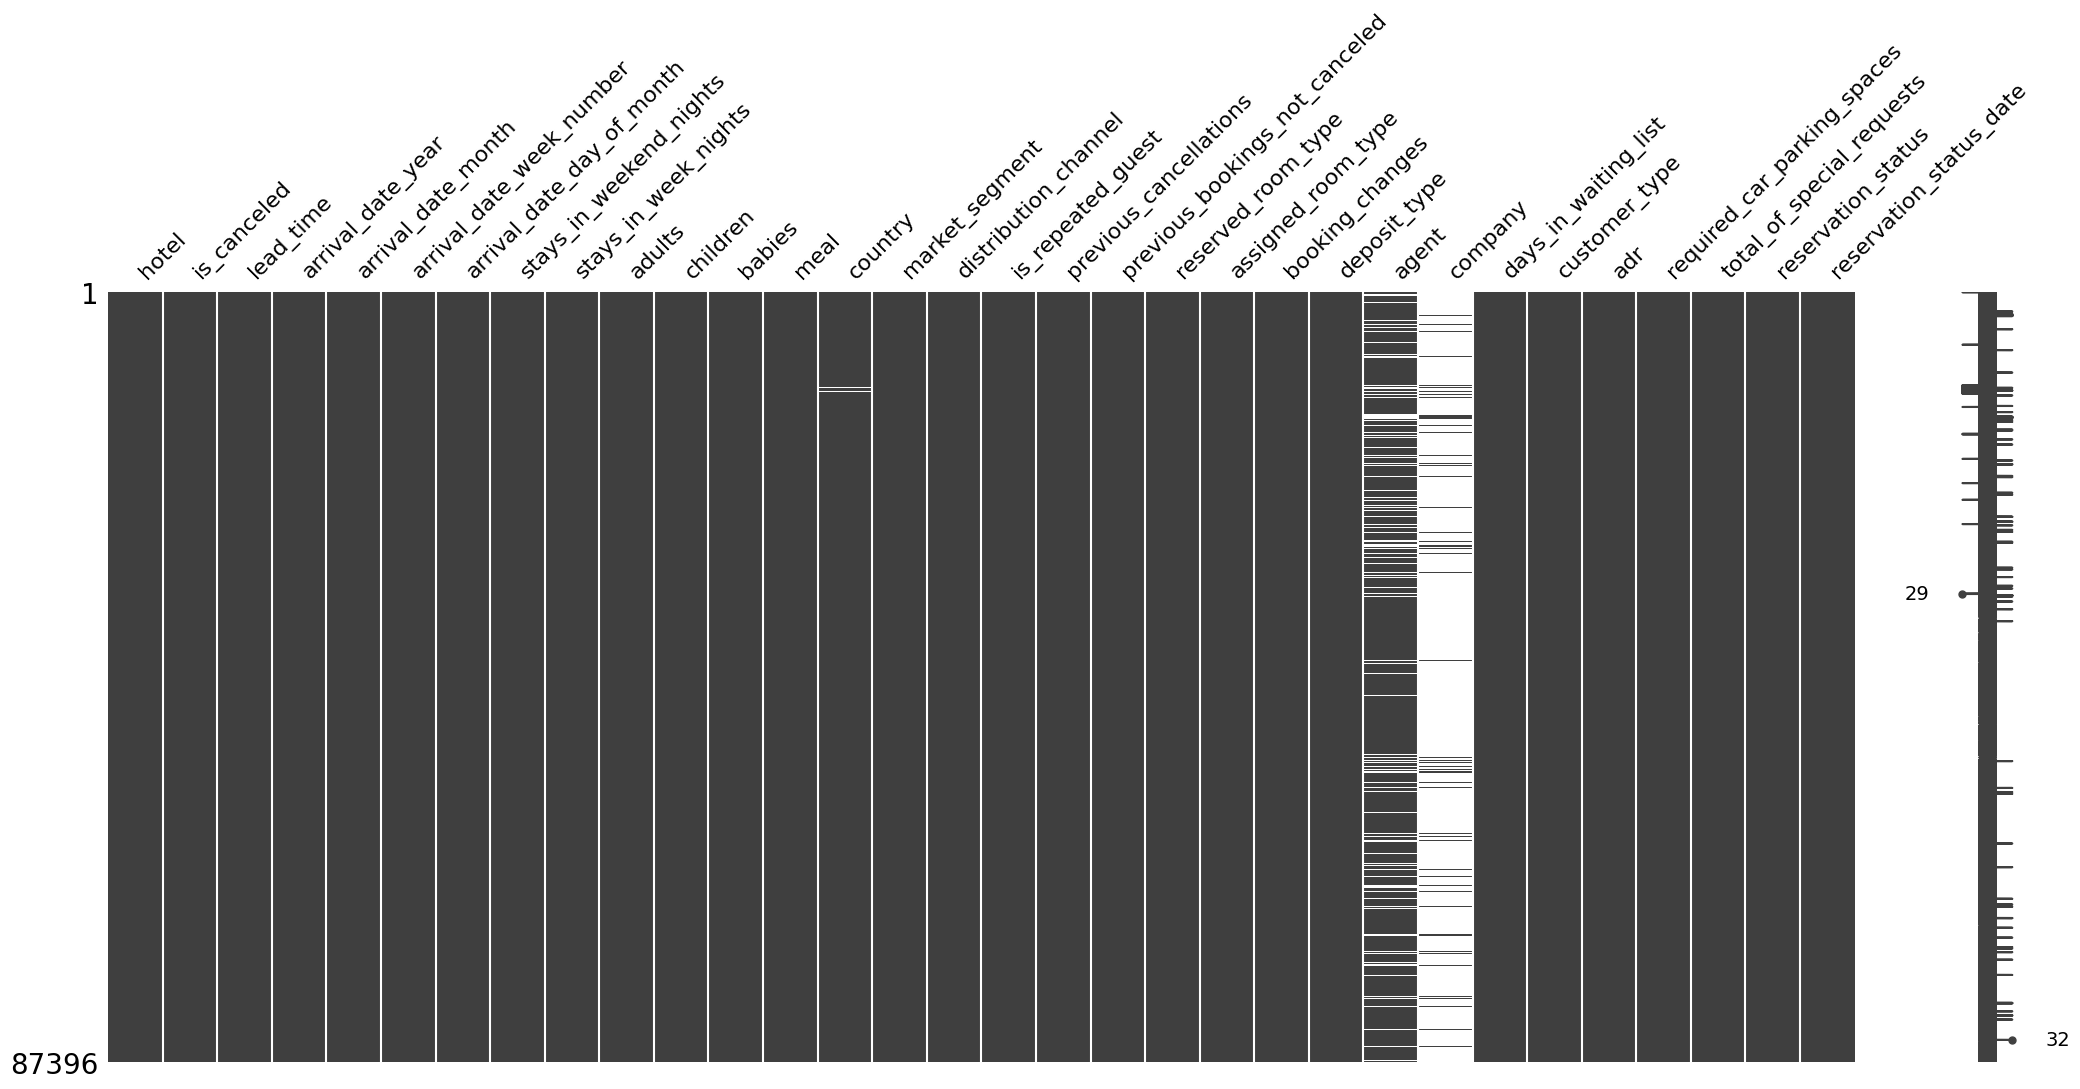

In [9]:
# Plotting bar chart of nullity in dataset
msno.matrix(df=df)

# Displaying chart
plt.show()

Notes:
* `hotel`, `is_canceled`, `lead_time`, and other columns with similar visualizations are completely populated with values.
* `country` only has a small amount of missing values (so does `children` actually, but it is not shown well in this visualization).
* `agent` have spotty chart/visualization, indicating randomness in missing values.
* `company` is dominated with blank chart, with no discernible pattern in missing value (a bit of data points are randomly filled with values).

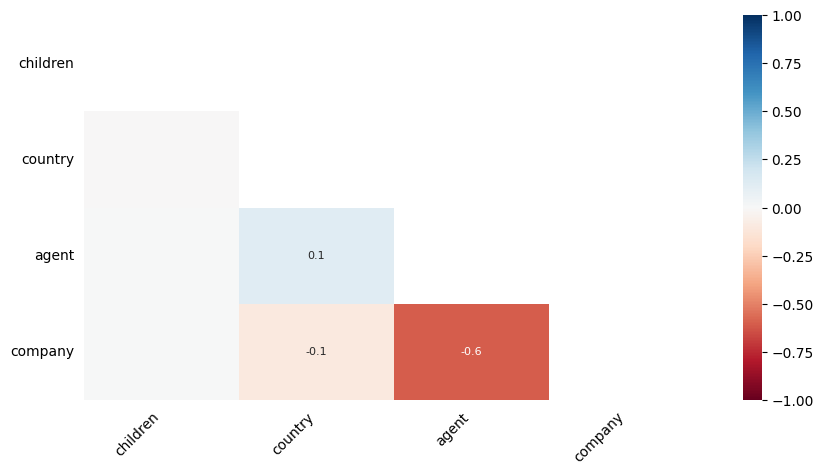

In [10]:
# Plotting heatmap of nullity in dataset
msno.heatmap(df=df, 
                  figsize=(10, 5), # Applying parameter for smaller figure size
                  fontsize=10) # Applying parameter for smaller font size

# Displaying chart
plt.show()

Notes:

* Nullity correlation ranges from -1 (if one variable appears, the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears, the other definitely also does).
* Correlations are computed using `pandas.corr()` default/standard method (Pearson's).
* Based on this correlation, data points which contain values in `company` are mostly incomplete (have missing value) in `agent`, and so otherwise.

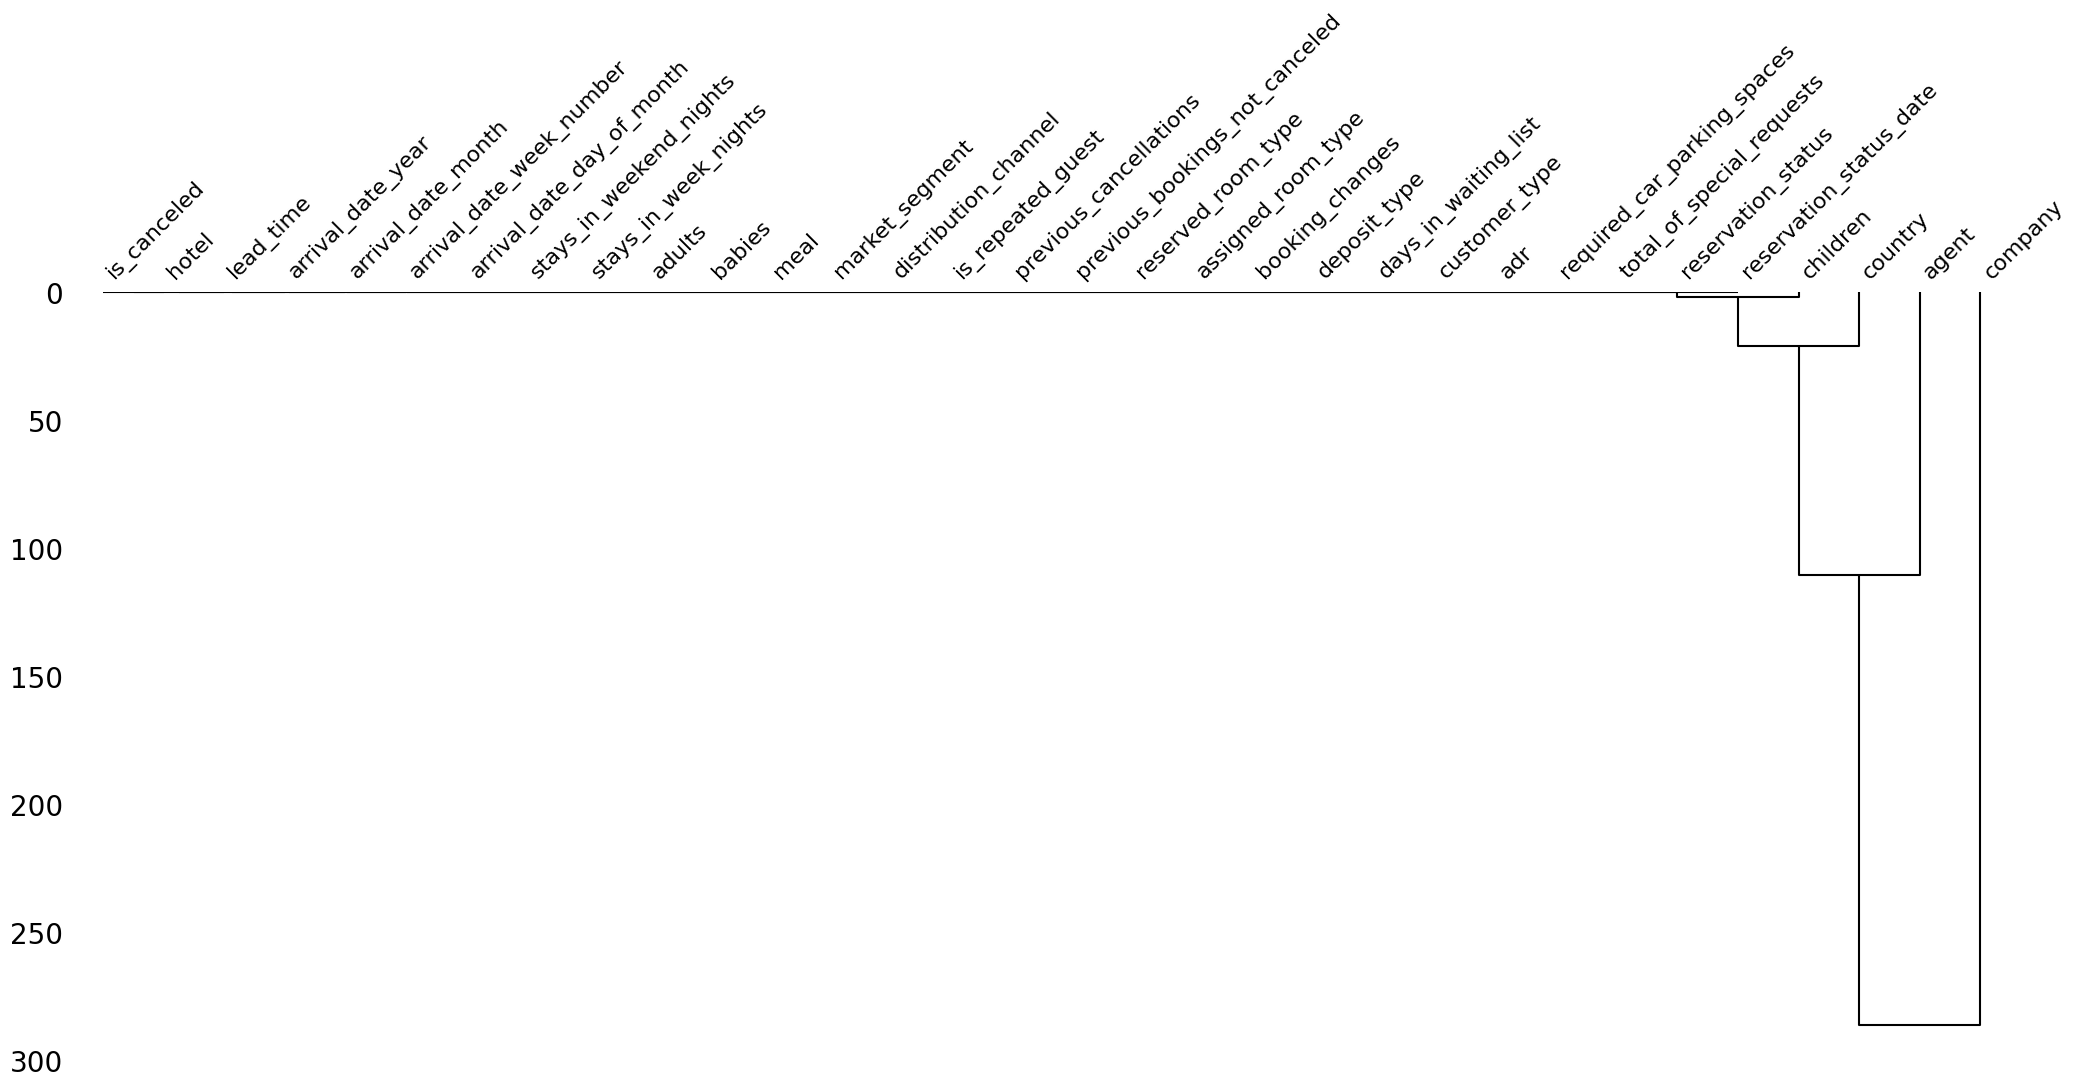

In [11]:
# Plotting dendrogram of nullity in dataset
msno.dendrogram(df=df)

# Displaying chart
plt.show()

Notes:
* Cluster leaves (variables) which linked together at a distance of zero (as shown in y-axis) fully predict one another's presence —one variable might always be empty when another is filled, or they might always both be filled or both empty.
* In this chart, the dendrogram glues together the variables that are present in every data point (i.e. from `is_canceled` to `total_of_special_requests`)
* Cluster leaves which split close to zero (`reservation_status` and `children`) predict one another very well, but still imperfectly.
* In contrast with this, `agent` and `company` are not linked directly, but through several steps of splitting in the dendrogram. This indicates that values (either observed or missing) in these columns are not exactly correlated with each other, but through combinations with values in `reservation_status`, `children`, and `country`.

### Tabular Analysis

In [12]:
# Filtering data with missing value in 'children'
with pd.option_context('display.max_columns', None): # Setting maximum number of column displayed to unlimited
    display(df[df.children.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Notes:

* Data with missing value in `children` has similar value in `hotel`, `is_canceled`, `arrival_date_year`, etc. but also different value in `lead_time`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, etc. In other words, those missing data points are a random subset of the data.
* No available information (i.e. other variables in the dataset or information from data description) regarding the missing value in `children`, and
* No known mechanism or reason why the missing values in `children` are introduced in the dataset.

Therefore, based on previous graphical & tabular analyses, missing value in `children` **may be regarded as Missing Completely At Random (MCAR)**. If values for observations are missing completely at random, then **disregarding those cases would not bias the inferences made through the machine learning algorithm or model; especially when the number/percentage of missing value is relatively small**.

In [13]:
# Filtering data with missing value in 'country'
with pd.option_context('display.max_columns', None):
    display(df[df.country.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


Notes:

Similar with above explanation, data with missing value in `country` are even more differing with each other, which **may also be regarded as MCAR**.


In [14]:
df.dropna(subset=['children'], inplace=True)
df.dropna(subset=['country'], inplace=True)

In [15]:
# Filtering data without missing value in 'agent' and 'company'
df[(df.agent.notna()) & df.company.notna()][['agent', 'company']]

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
...,...,...
112499,9.0,478.0
113046,290.0,148.0
113082,290.0,148.0
113627,14.0,229.0


Notes:

* Values in `agent` and `company` are not exactly the same or matched with each other.
    * This indicates that the travel agency and the company/entity that made the booking are not the same for each data point.
    * Hence, it would not be appropriate/suitable to impute missing value in `agent` based on available value in `company` per data point, and vice versa.
* Based on previous findings, `agent` and `company` also have:
    * Significant amount of missing values: `13.69%` and `94.31%`, respectively.
    * High cardinality: `333` and `352` unique values, and
    * Moderate to high correlation with other variables in dataset; especially correlated with target `is_canceled`.

Therefore, these variables will not be included as features in the prediction modeling, and **missing values in these columns will not be handled**.

In [16]:
df = df.drop(columns= ['agent', 'company'])

## Invalid Data

In [17]:
# Casting variables to their appropriate data type
df = df.astype(dtype={'children': 'Int64'})

# Replacing values with other appropriate values
df.replace(to_replace={'meal': {'Undefined': 'SC'},
                       'is_canceled': {0: 'Not Canceled',
                                       1: 'Canceled'},
                       'is_repeated_guest': {0: 'Not Repeated',
                                             1: 'Repeated'}}, inplace=True)

# Verifying process
display(df[['children']].dtypes)
display(df.meal.unique())

children    Int64
dtype: object

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

## Data Merging

In [18]:
# Merging 'stays_in_week_nights' and 'stays_in_weekend_nights'
df.insert(loc=df.columns.get_loc(key='stays_in_week_nights') + 1, 
          column='total_stays_in_nights', 
          value=df.stays_in_week_nights + df.stays_in_weekend_nights)

# Merging 'adults', 'children', and 'babies'
df.insert(loc=df.columns.get_loc(key='babies') + 1, 
          column='total_guests', 
          value=df.adults + df.children + df.babies)

# Combining 'total_stays_in_nights' and 'adr'
df.insert(loc=df.columns.get_loc(key='adr') + 1, 
          column='revenue', 
          value=df.total_stays_in_nights * df.adr)

with pd.option_context('display.max_column', None):
    display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stays_in_nights,adults,children,babies,total_guests,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,revenue,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not Canceled,342,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,Not Repeated,0,0,C,C,3,No Deposit,0,Transient,0.0,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not Canceled,737,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,Not Repeated,0,0,C,C,4,No Deposit,0,Transient,0.0,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Not Canceled,7,2015,July,27,1,0,1,1,1,0,0,1,BB,GBR,Direct,Direct,Not Repeated,0,0,A,C,0,No Deposit,0,Transient,75.0,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Not Canceled,13,2015,July,27,1,0,1,1,1,0,0,1,BB,GBR,Corporate,Corporate,Not Repeated,0,0,A,A,0,No Deposit,0,Transient,75.0,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Not Canceled,14,2015,July,27,1,0,2,2,2,0,0,2,BB,GBR,Online TA,TA/TO,Not Repeated,0,0,A,A,0,No Deposit,0,Transient,98.0,196.0,0,1,Check-Out,2015-07-03


| Variable | Type |
| --- | --- |
| hotel | I |
| lead_time | I |
| arrival_date_year | E |
| arrival_date_month | E |
| arrival_date_week_number | E |
| arrival_date_day_of_month | E |
| total_stays_in_nights | E |
| total_guests | E |
| meal | I |
| country | E |
| market_segment | I |
| distribution_channel | I |
| is_repeated_guest | I |
| previous_cancellations | I |
| previous_bookings_not_canceled | I |
| reserved_room_type | E |
| assigned_room_type | I |
| booking_changes | E |
| deposit_type | I |
| agent | I |
| company | I |
| days_in_waiting_list | I |
| customer_type | I |
| revenue | I |
| required_car_parking_spaces | E |
| total_of_special_requests | E |
| reservation_status | I |
| reservation_status_date | I |

---

# **Data Analysis**

## Initial Data Analysis

### Categorical Variable

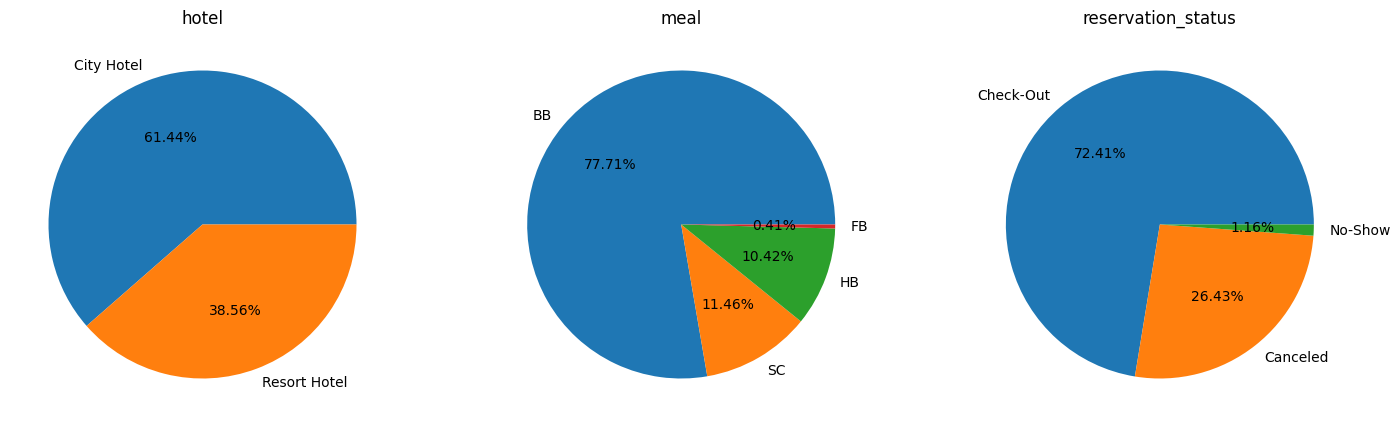

In [19]:
# Setting figure size in inches
plt.figure(figsize=(17.5, 5))

# Plotting pie charts
plt.subplot(1, 3, 1) # Adding pie chart into subplot figure
plt.title(label='hotel') # Setting chart title
plt.pie(x=df.hotel.value_counts(), # Showing counts of observations
        labels=df.hotel.value_counts().index, # Adding labels to chart
        autopct='%.2f%%') # Adding percentage values to chart

plt.subplot(1, 3, 2)
plt.title(label='meal')
plt.pie(x=df.meal.value_counts(), labels=df.meal.value_counts().index, autopct='%.2f%%')

plt.subplot(1, 3, 3)
plt.title(label='reservation_status')
plt.pie(x=df.reservation_status.value_counts(), labels=df.reservation_status.value_counts().index, autopct='%.2f%%')

plt.show() # Displaying chart

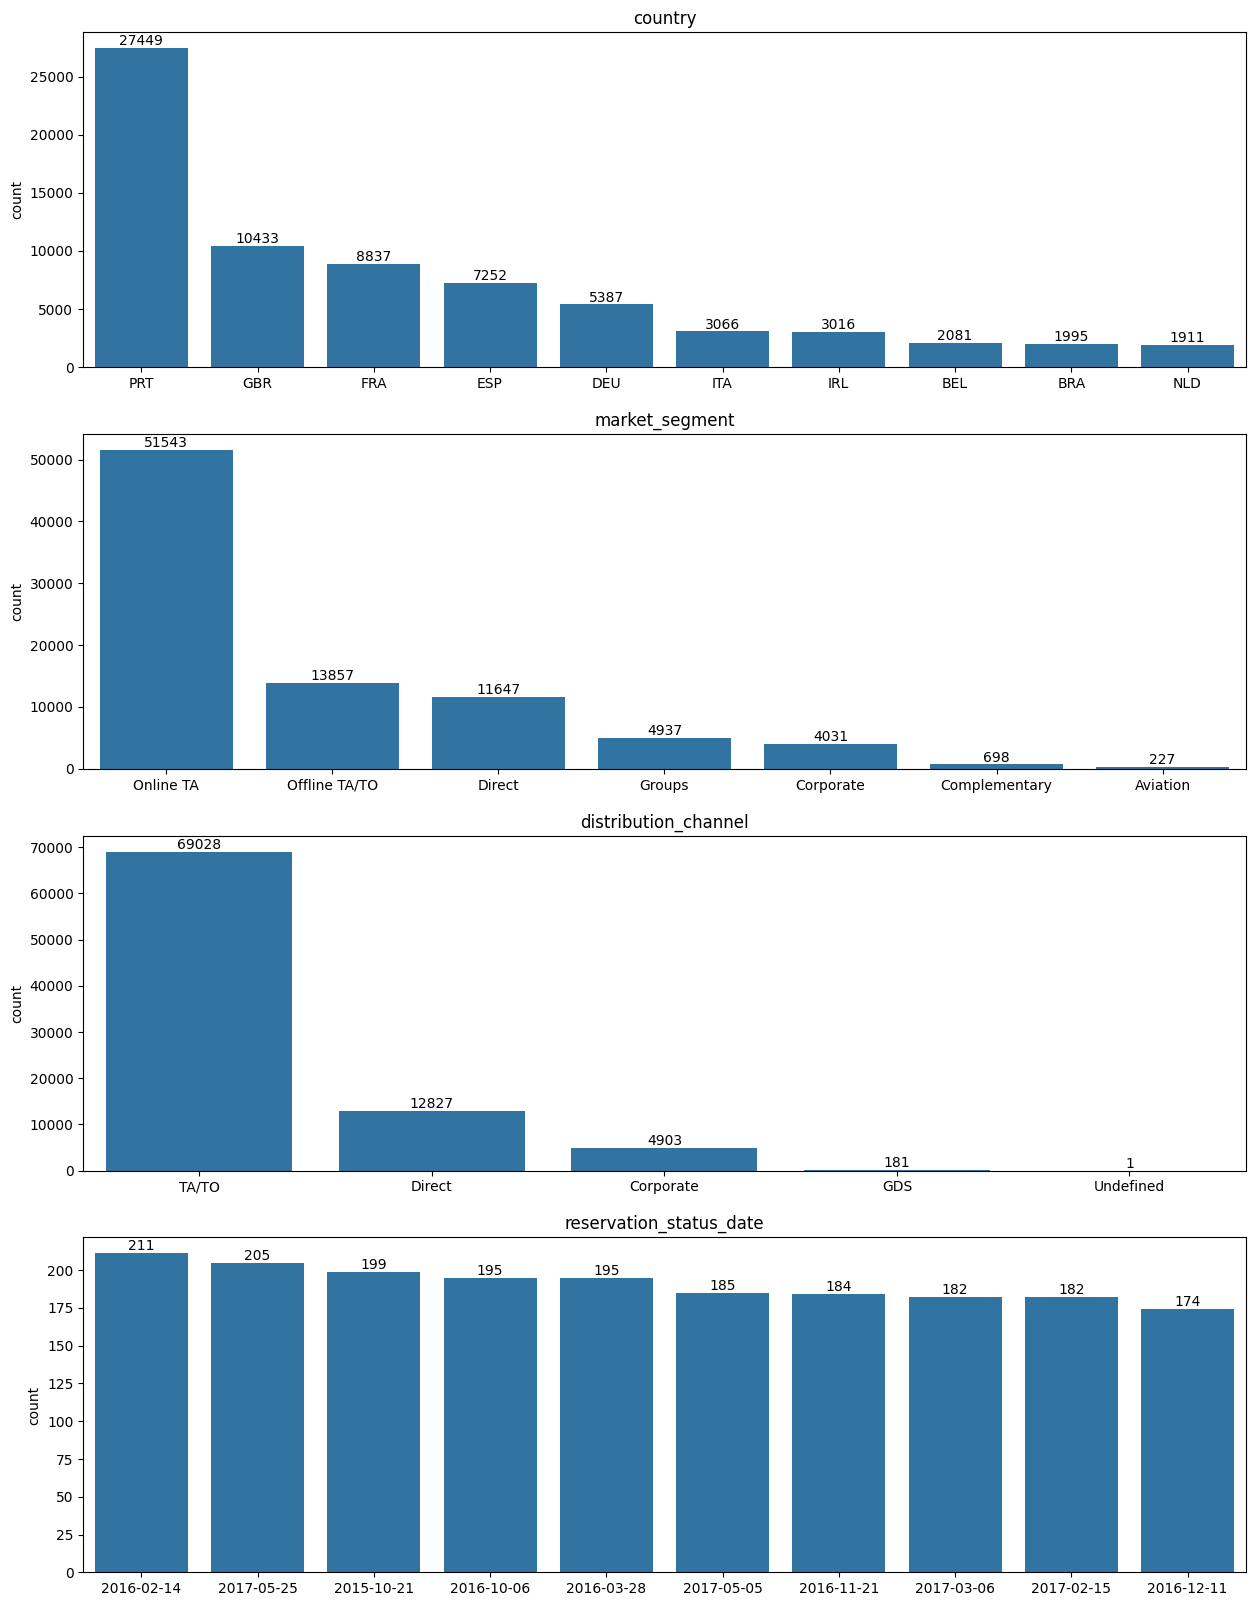

In [20]:
# Creating subplots
fig, axs = plt.subplots(nrows=4, ncols=1, # Setting number of rows & columns
                        figsize=(15, 20))

# Plotting bar charts
ax = sns.countplot(data=df, x='country', # Showing counts of observation
                   order=df.country.value_counts() # Ordering chart by values in descending order
                                   .iloc[:10].index, # Selecting top 10 values
                   ax=axs[0]) # Putting chart into subplot
ax.set(title='country', 
       xlabel=None) # Removing redundant x-axis label
ax.bar_label(container=ax.containers[0]) # Adding labels to chart

ax = sns.countplot(data=df, x='market_segment', order=df.market_segment.value_counts().index, ax=axs[1])
ax.set(title='market_segment', xlabel=None)
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='distribution_channel', order=df.distribution_channel.value_counts().index, ax=axs[2])
ax.set(title='distribution_channel', xlabel=None)
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='reservation_status_date', order=df.reservation_status_date.value_counts().iloc[:10].index, ax=axs[3])
ax.set(title='reservation_status_date', xlabel=None)
ax.bar_label(container=ax.containers[0])

plt.show()

Notes:

Because of high cardinality in `country` and `reservation_status_date`, and for ease of reading, visualizations of these variables are limited to show only top 10 values based on the counts of observations.

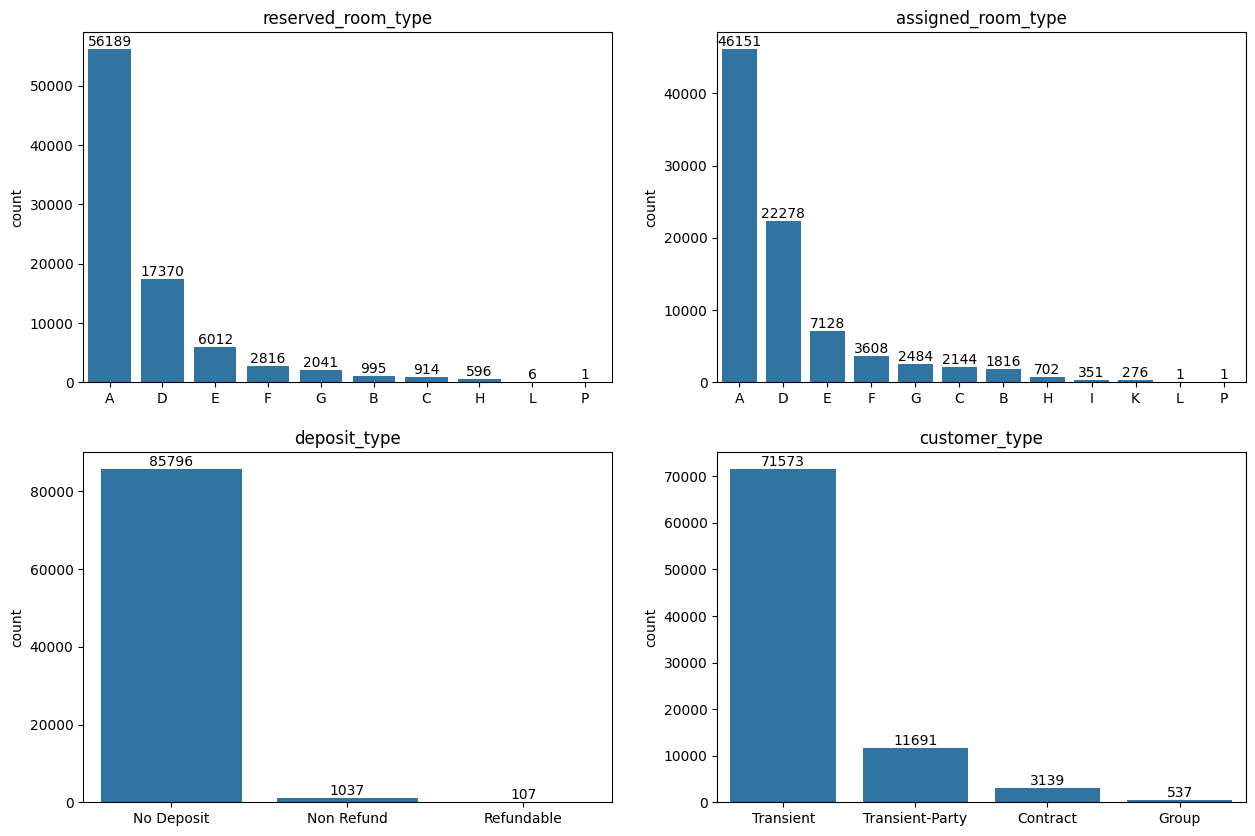

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax = sns.countplot(data=df, x='reserved_room_type', order=df.reserved_room_type.value_counts().index, ax=axs[0, 0])
ax.set(title='reserved_room_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='assigned_room_type', order=df.assigned_room_type.value_counts().index, ax=axs[0, 1])
ax.set(title='assigned_room_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='deposit_type', order=df.deposit_type.value_counts().index, ax=axs[1, 0])
ax.set(title='deposit_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='customer_type', order=df.customer_type.value_counts().index, ax=axs[1, 1])
ax.set(title='customer_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

plt.show()

### Numerical Variable

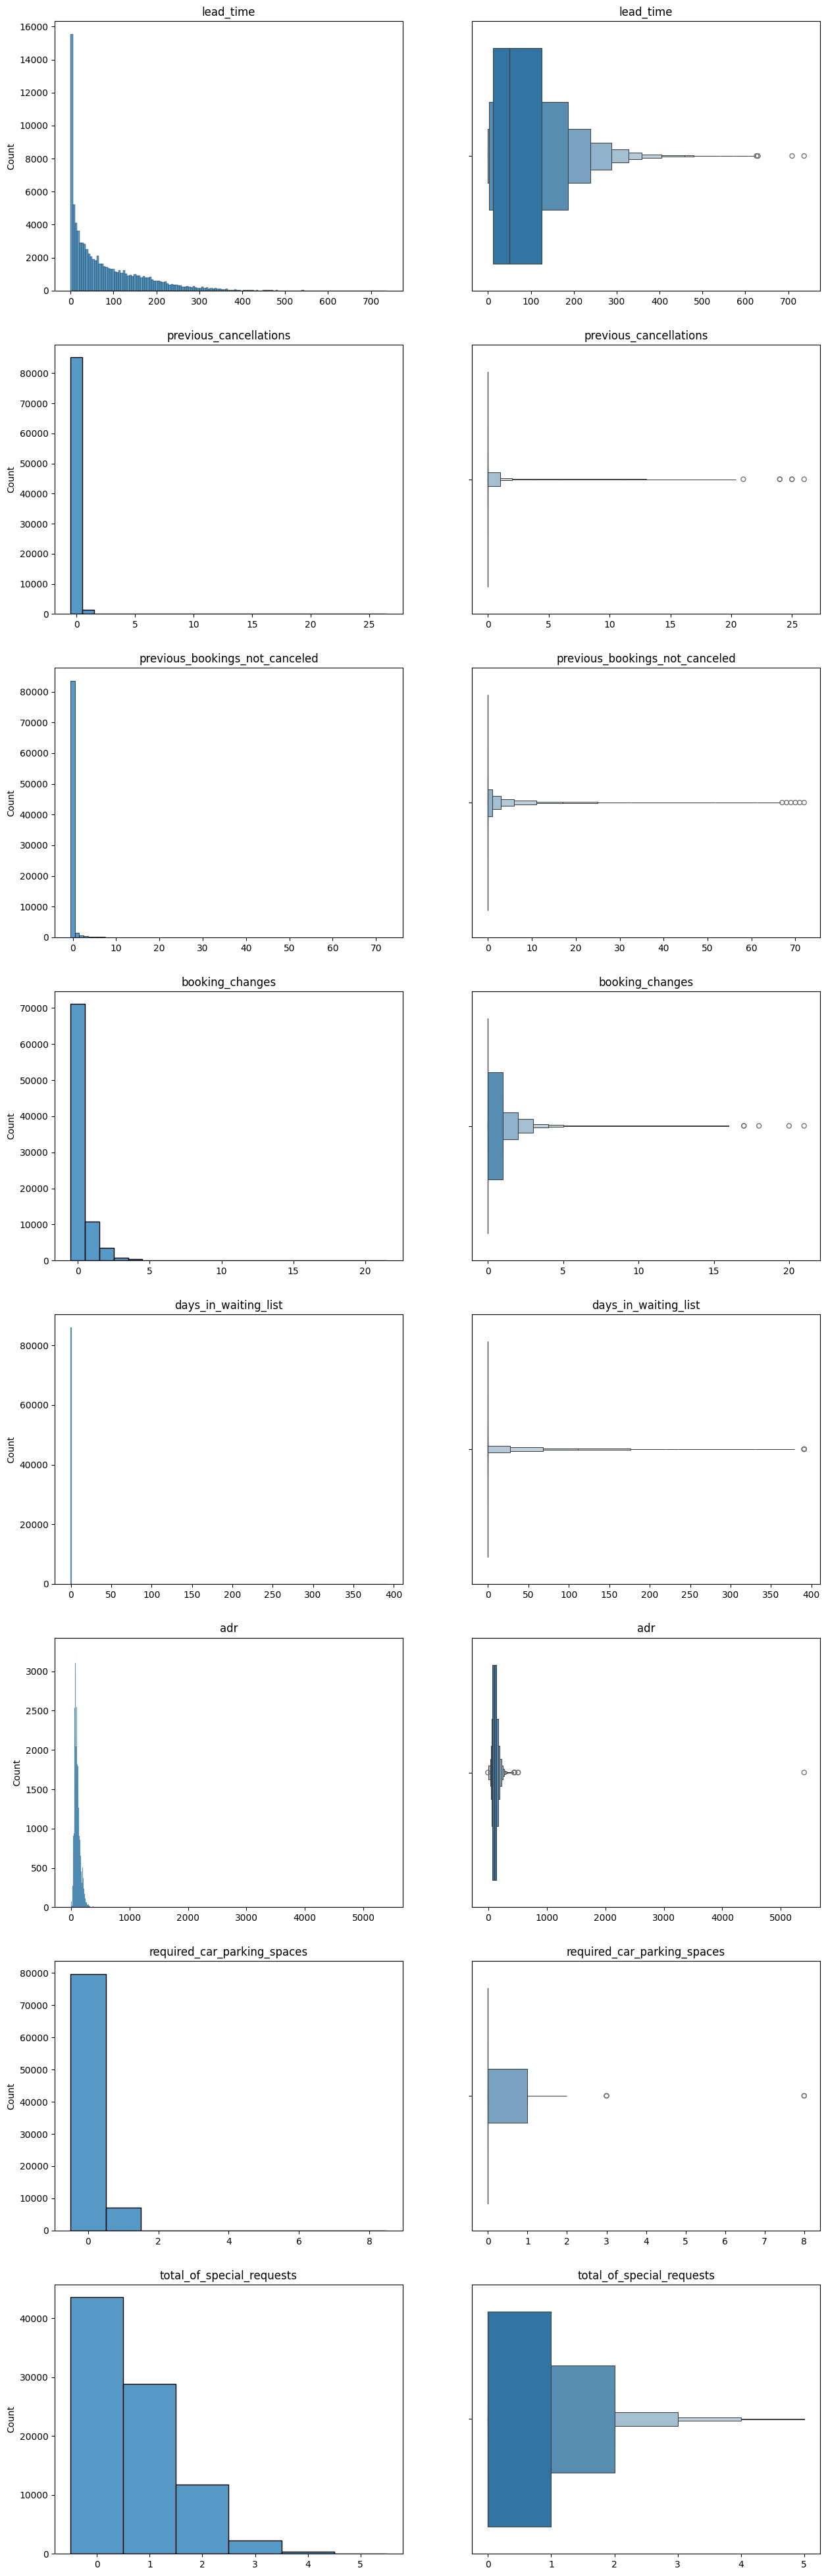

In [22]:
# Plotting numerical variables
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(15, 50))

sns.histplot(data=df, x='lead_time', ax=axs[0, 0]).set(xlabel=None, title='lead_time')
sns.boxenplot(data=df, x='lead_time', ax=axs[0, 1]).set(xlabel=None, title='lead_time')

sns.histplot(data=df, x='previous_cancellations', discrete=True, ax=axs[1, 0]).set(xlabel=None, title='previous_cancellations')
sns.boxenplot(data=df, x='previous_cancellations', ax=axs[1, 1]).set(xlabel=None, title='previous_cancellations')

sns.histplot(data=df, x='previous_bookings_not_canceled', discrete=True, ax=axs[2, 0]).set(xlabel=None, title='previous_bookings_not_canceled')
sns.boxenplot(data=df, x='previous_bookings_not_canceled', ax=axs[2, 1]).set(xlabel=None, title='previous_bookings_not_canceled')

sns.histplot(data=df, x='booking_changes', discrete=True, ax=axs[3, 0]).set(xlabel=None, title='booking_changes')
sns.boxenplot(data=df, x='booking_changes', ax=axs[3, 1]).set(xlabel=None, title='booking_changes')

sns.histplot(data=df, x='days_in_waiting_list', discrete=True, ax=axs[4, 0]).set(xlabel=None, title='days_in_waiting_list')
sns.boxenplot(data=df, x='days_in_waiting_list', ax=axs[4, 1]).set(xlabel=None, title='days_in_waiting_list')

sns.histplot(data=df, x='adr', ax=axs[5, 0]).set(xlabel=None, title='adr')
sns.boxenplot(data=df, x='adr', ax=axs[5, 1]).set(xlabel=None, title='adr')

sns.histplot(data=df, x='required_car_parking_spaces', discrete=True, ax=axs[6, 0]).set(xlabel=None, title='required_car_parking_spaces')
sns.boxenplot(data=df, x='required_car_parking_spaces', ax=axs[6, 1]).set(xlabel=None, title='required_car_parking_spaces')

sns.histplot(data=df, x='total_of_special_requests', discrete=True, ax=axs[7, 0]).set(xlabel=None, title='total_of_special_requests')
sns.boxenplot(data=df, x='total_of_special_requests', ax=axs[7, 1]).set(xlabel=None, title='total_of_special_requests')

plt.show()

In [23]:
# # Listing numerical variables
# numeric_vars = df.select_dtypes(include='number')

# # Showing statistic values of numerical variables
# pd.DataFrame(data={'numeric_variables': numeric_vars.columns,
#                    'skewness': numeric_vars.apply(func=lambda var: var.skew()).values,
#                    'kurtosis': numeric_vars.apply(func=lambda var: var.kurt()).values,
#                    'kstest_statistics': numeric_vars.apply(lambda var: kstest(rvs=var, cdf='norm') # Comparing numerical vars against normal distribution
#                                                                               [0]).values,
#                    'kstest_pvalues': numeric_vars.apply(lambda var: kstest(rvs=var, cdf='norm')[1]).values,
#                    'normaltest_statistics': numeric_vars.apply(lambda var: normaltest(a=var, nan_policy='omit')[0]).values,
#                    'normaltest_pvalues': numeric_vars.apply(lambda var: normaltest(a=var, nan_policy='omit')[1]).values})

Notes:
* Skewness with positive value indicates variable with positive distribution or right-skewed, and otherwise for negative value.
* Kurtosis value above 3 —using Fisher's definition of kurtosis— indicates variable with more extreme outliers than normal distribution (leptokurtic), and otherwise for below 3 (mesokurtic).
* P-value of normality test used (Kolmogorov-Smirnov and D'Agostino-Pearson, respectively) below critical statistical significance (0.05) indicates that we may reject the null hypotheses and assumes that the variable is not normally distributed.

Based on graphical & statistical summaries above, it may be concluded that **all numerical variables in dataset are not normally distributed (non-parametric)**.

## Exploratory Data Analysis

#### **Percentage of Hotel Type**

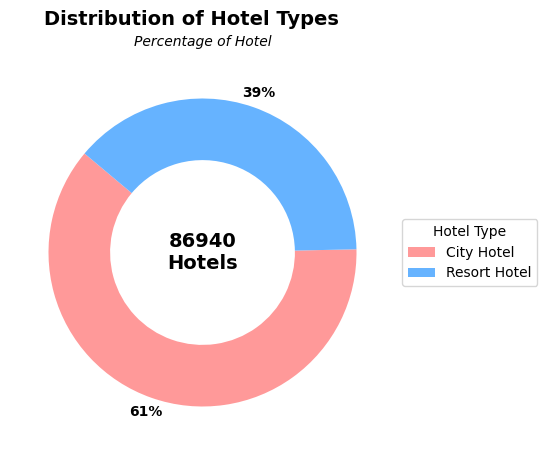

In [24]:
hotel_counts = df['hotel'].value_counts()

# Warna untuk setiap jenis hotel
colors = ['#ff9999','#66b3ff']

# Buat donut chart dengan inner radius lebih kecil
fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    hotel_counts,
    labels=None,  # Tidak menampilkan label hotel
    autopct='%1.0f%%',
    pctdistance=1.1,  # Menempatkan persentase di luar
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Lebih kecil inner radius
)

# Tambahkan jumlah total hotel di tengah-tengah donut chart
total_hotels = hotel_counts.sum()
ax.text(0, 0, f'{total_hotels}\nHotels', horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold', color='black')

plt.setp(autotexts, size=10, weight='bold', color='black')

# Tambahkan legenda
ax.legend(wedges, hotel_counts.index, title="Hotel Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tambahkan subtitle
plt.suptitle('Distribution of Hotel Types', fontsize=14, weight='bold')
plt.title('Percentage of Hotel', fontsize=10, style='italic', pad=10)

plt.show()

#### **Cancellation Percentage**

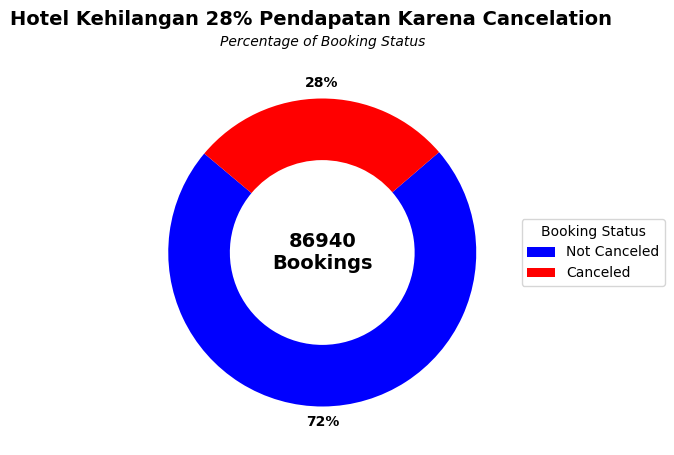

In [25]:
booking_counts = df['is_canceled'].value_counts()

# Warna untuk setiap jenis hotel
colors = ['blue','red']

# Buat donut chart dengan inner radius lebih kecil
fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    booking_counts,
    labels=None,
    autopct='%1.0f%%',
    pctdistance=1.1,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Lebih kecil inner radius
)

# Tambahkan jumlah total hotel di tengah-tengah donut chart
total_booking = booking_counts.sum()
ax.text(0, 0, f'{total_booking}\nBookings', horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold', color='black')

plt.setp(autotexts, size=10, weight='bold', color='black')

# Tambahkan legenda
ax.legend(wedges, booking_counts.index, title="Booking Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tambahkan subtitle
plt.suptitle('Hotel Kehilangan 28% Pendapatan Karena Cancelation', fontsize=14, weight='bold')
plt.title('Percentage of Booking Status', fontsize=10, style='italic', pad=10)

plt.show()

#### **Booking Status of Each Hotel**

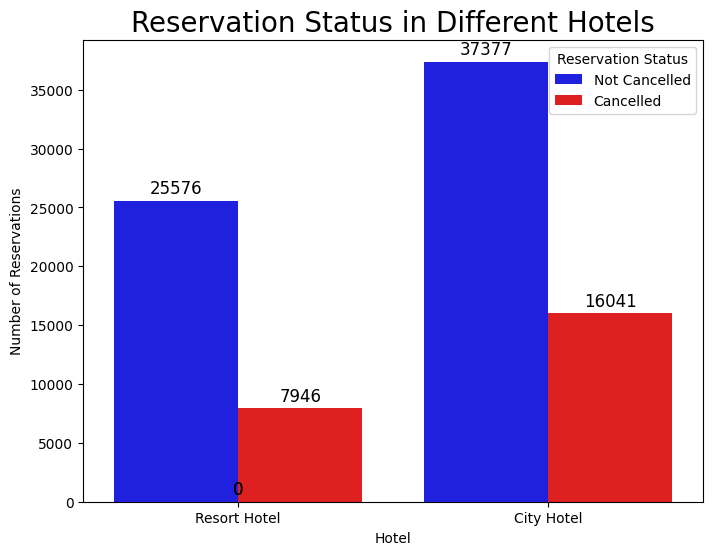

In [26]:
plt.figure(figsize=(8, 6))

# Tentukan palet warna
palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

# Buat countplot dengan warna yang ditentukan
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=palette)

# Atur legend dan posisi
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

# Tambahkan label di atas setiap bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),  # Offset label dari bar
                 textcoords='offset points')

# Atur judul dan label sumbu
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

plt.show()

#### **Booking Status of Each Hotel**

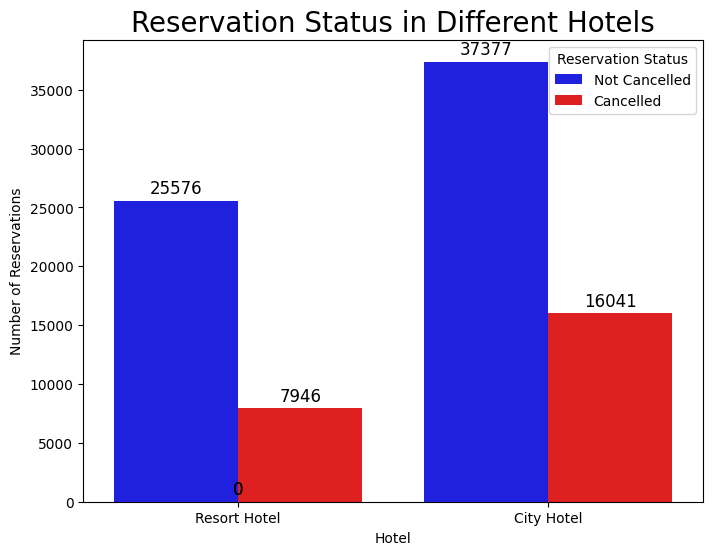

In [27]:
plt.figure(figsize=(8, 6))

# Tentukan palet warna
palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

# Buat countplot dengan warna yang ditentukan
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=palette)

# Atur legend dan posisi
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

# Tambahkan label di atas setiap bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),  # Offset label dari bar
                 textcoords='offset points')

# Atur judul dan label sumbu
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

plt.show()

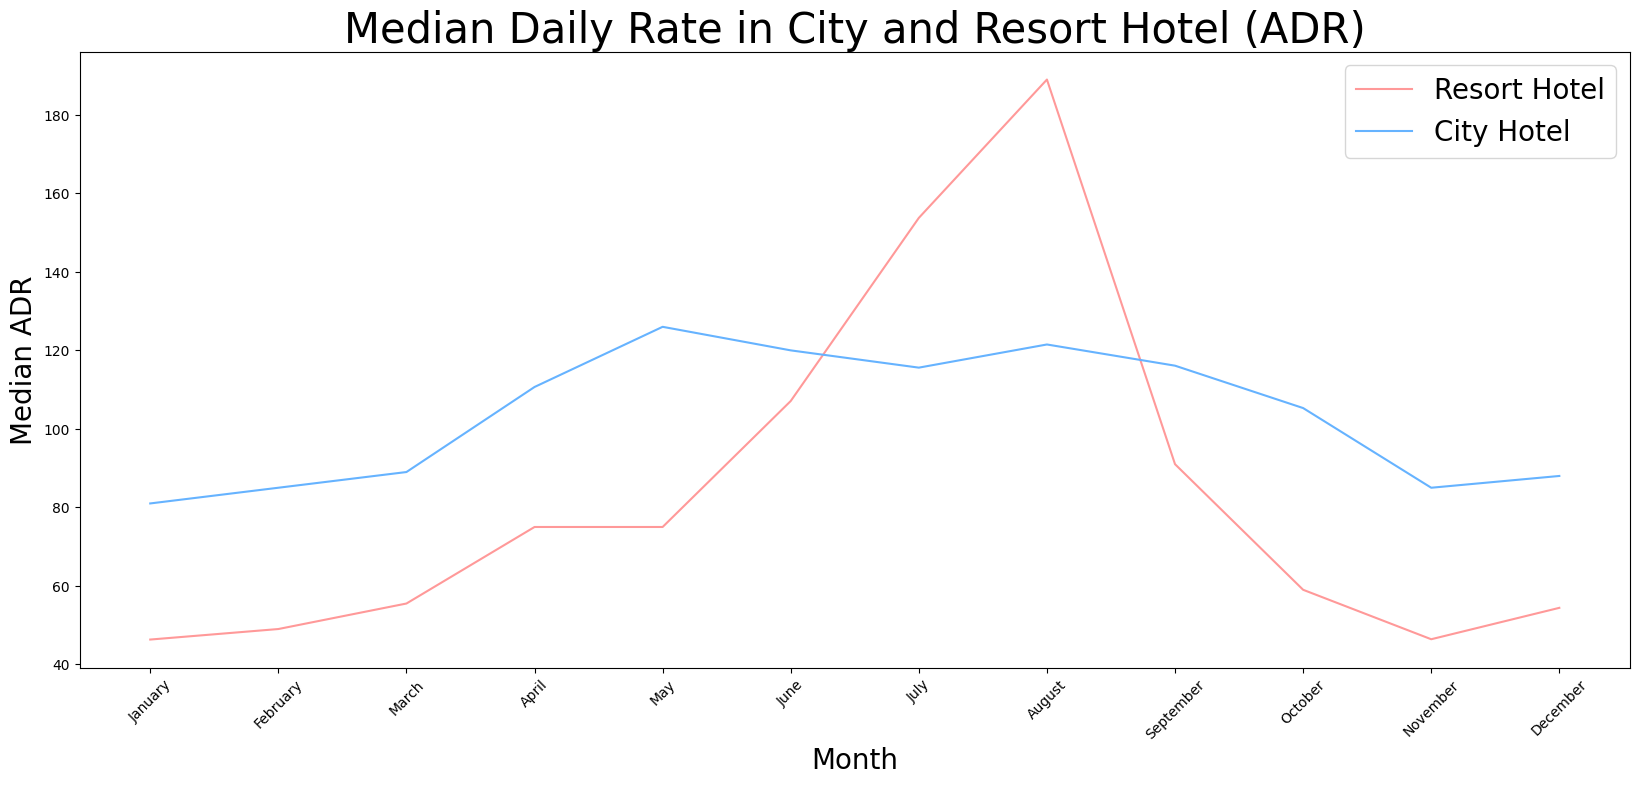

In [28]:
# Filter the data
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates
resort_cancellation_rate = resort_hotel['is_canceled'].value_counts(normalize=True)
city_cancellation_rate = city_hotel['is_canceled'].value_counts(normalize=True)

# Group by arrival month and calculate median ADR
resort_hotel_grouped = resort_hotel.groupby('arrival_date_month')[['adr']].median()
city_hotel_grouped = city_hotel.groupby('arrival_date_month')[['adr']].median()

# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the index to a categorical type with a specific order
resort_hotel_grouped.index = pd.Categorical(resort_hotel_grouped.index, categories=month_order, ordered=True)
city_hotel_grouped.index = pd.Categorical(city_hotel_grouped.index, categories=month_order, ordered=True)

# Sort by the month order
resort_hotel_grouped = resort_hotel_grouped.sort_index()
city_hotel_grouped = city_hotel_grouped.sort_index()

# Define colors
colors = ['#ff9999', '#66b3ff']  # Colors for Resort Hotel and City Hotel

# Plotting
plt.figure(figsize=(20, 8))
plt.title('Median Daily Rate in City and Resort Hotel (ADR)', fontsize=30)
plt.plot(resort_hotel_grouped.index, resort_hotel_grouped['adr'], label='Resort Hotel', color=colors[0])
plt.plot(city_hotel_grouped.index, city_hotel_grouped['adr'], label='City Hotel', color=colors[1])
plt.legend(fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Median ADR', fontsize=20)
plt.xticks(rotation=45)
plt.show()

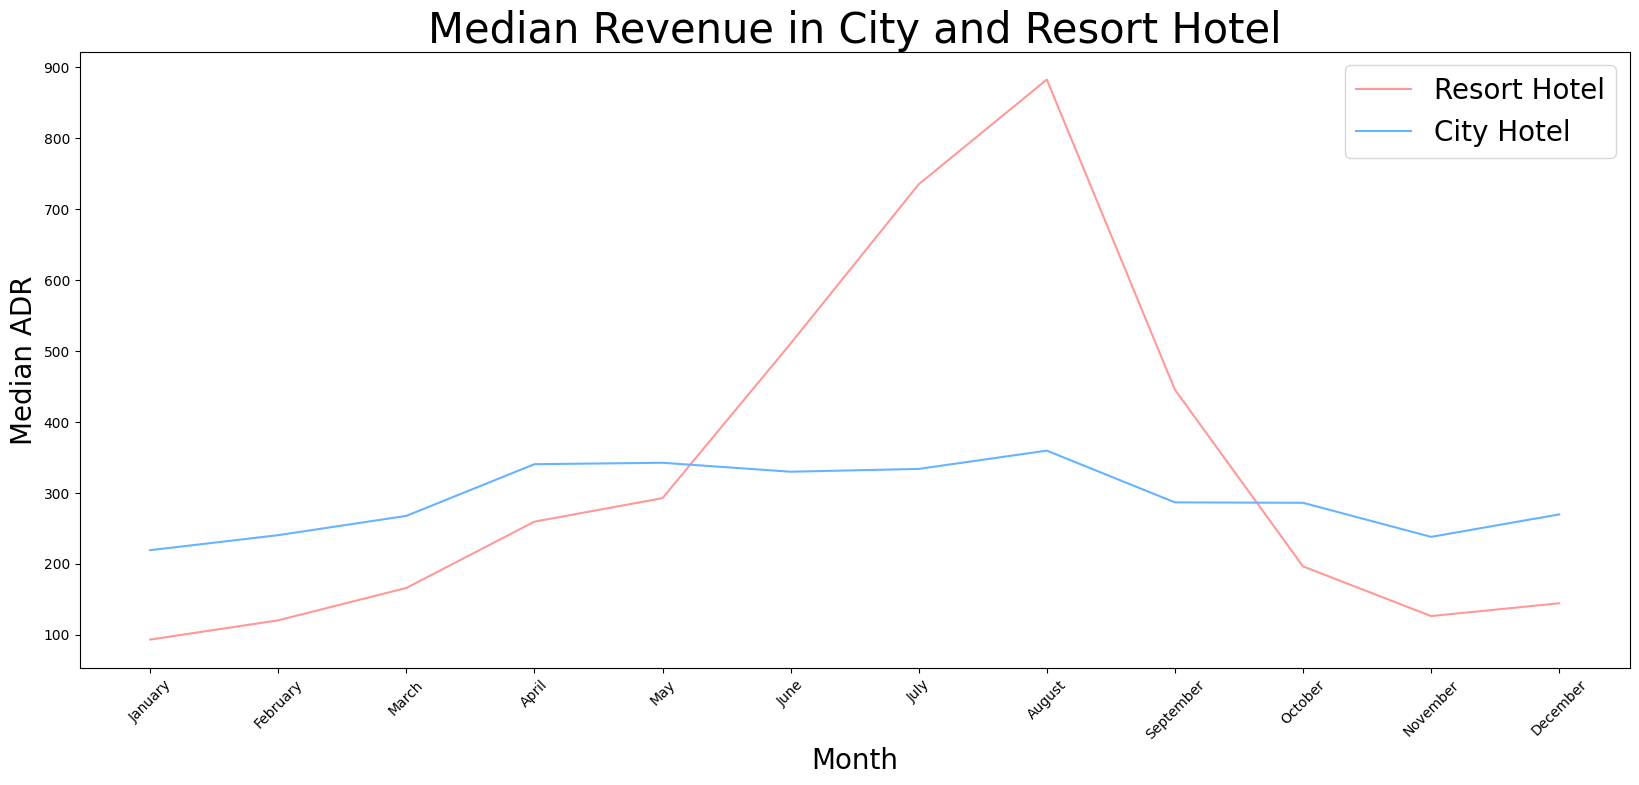

In [29]:
# Filter the data
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates
resort_cancellation_rate = resort_hotel['is_canceled'].value_counts(normalize=True)
city_cancellation_rate = city_hotel['is_canceled'].value_counts(normalize=True)

# Group by arrival month and calculate median ADR
resort_hotel_grouped = resort_hotel.groupby('arrival_date_month')[['revenue']].median()
city_hotel_grouped = city_hotel.groupby('arrival_date_month')[['revenue']].median()

# Define the month order
year_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the index to a categorical type with a specific order
resort_hotel_grouped.index = pd.Categorical(resort_hotel_grouped.index, categories=year_order, ordered=True)
city_hotel_grouped.index = pd.Categorical(city_hotel_grouped.index, categories=year_order, ordered=True)

# Sort by the month order
resort_hotel_grouped = resort_hotel_grouped.sort_index()
city_hotel_grouped = city_hotel_grouped.sort_index()

# Define colors
colors = ['#ff9999', '#66b3ff']  # Colors for Resort Hotel and City Hotel

# Plotting
plt.figure(figsize=(20, 8))
plt.title('Median Revenue in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel_grouped.index, resort_hotel_grouped['revenue'], label='Resort Hotel', color=colors[0])
plt.plot(city_hotel_grouped.index, city_hotel_grouped['revenue'], label='City Hotel', color=colors[1])
plt.legend(fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Median ADR', fontsize=20)
plt.xticks(rotation=45)
plt.show()

#### **Top Countries With Canceled Bookings**

In [30]:
cancelled_data = df[df['is_canceled']=='Canceled']
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country

country
PRT    9787
GBR    1985
ESP    1862
FRA    1733
ITA    1075
DEU    1053
BRA     727
IRL     668
USA     459
BEL     411
Name: count, dtype: int64

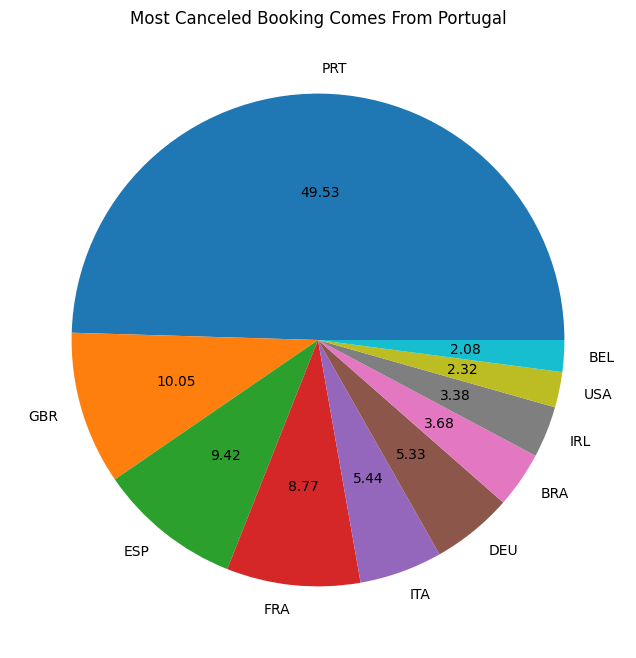

In [31]:
plt.figure(figsize = (8,8))
plt.title('Most Canceled Booking Comes From Portugal')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

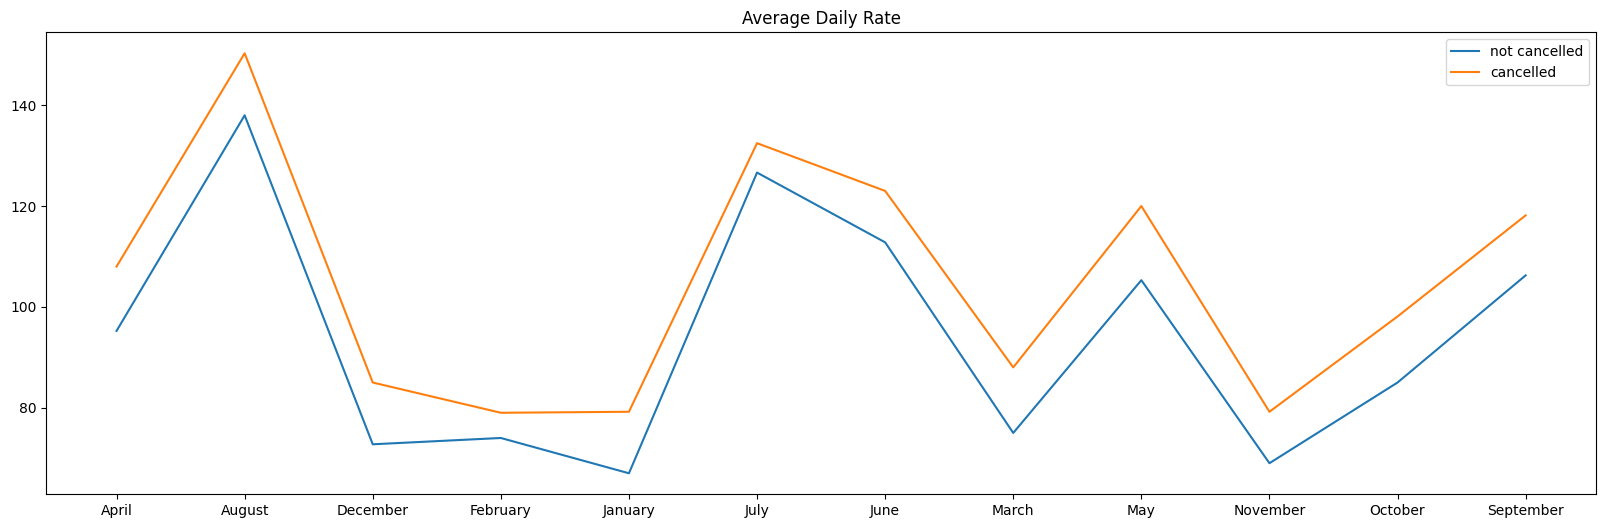

In [32]:
cancelled_df_adr = cancelled_data.groupby('arrival_date_month')[['adr']].median()
cancelled_df_adr.reset_index(inplace=True) 
cancelled_df_adr.sort_values('arrival_date_month', inplace=True)

not_cancelled_data = df[df['is_canceled']=='Not Canceled']
not_cancelled_df_adr = not_cancelled_data.groupby('arrival_date_month')[['adr']].median()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize =(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['arrival_date_month'], not_cancelled_df_adr['adr'], label= 'not cancelled') 
plt.plot(cancelled_df_adr['arrival_date_month'], cancelled_df_adr['adr'], label= 'cancelled')
plt.legend()

Mid Year has highest ADR (May, August, June, July)

#### **Market Segment**

<Axes: xlabel='market_segment'>

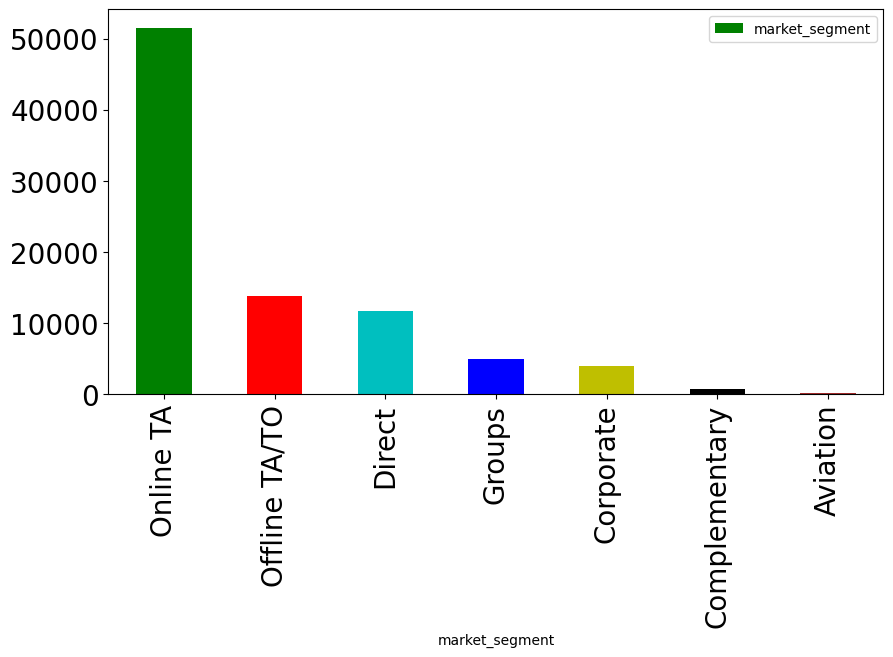

In [33]:
market_segment_df = pd.DataFrame(df['market_segment'])
market_segment_df_data = market_segment_df.groupby('market_segment')['market_segment'].count()
market_segment_df_data.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(10,5))
y = np.array([4,5,6])
market_segment_df_data.plot(kind = 'bar', color=['g', 'r', 'c', 'b', 'y', 'black', 'brown'], fontsize = 20,legend='True')

#### **Favourite Room Type**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


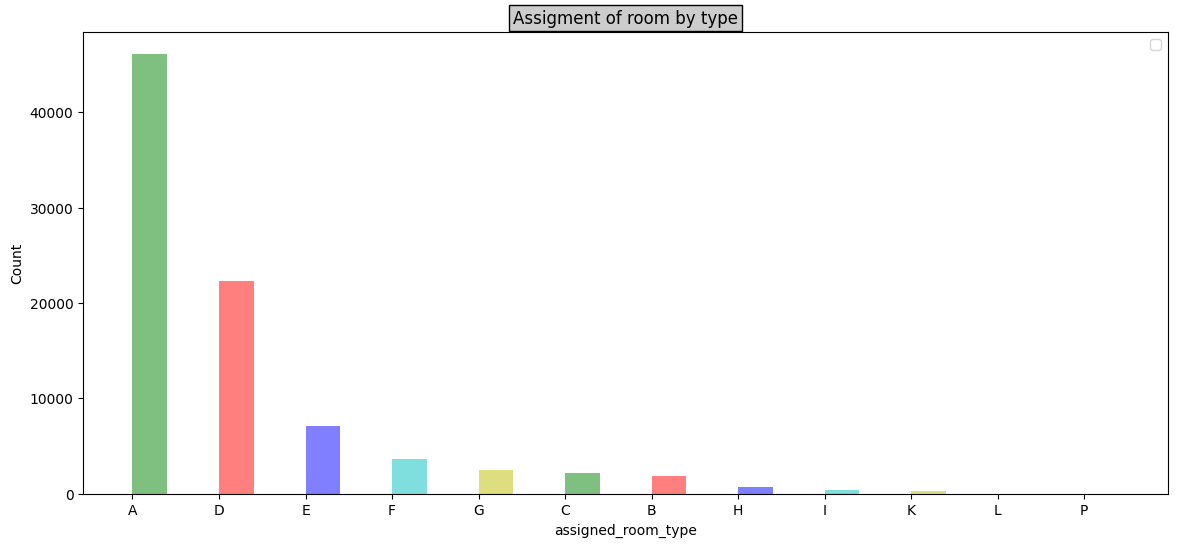

In [34]:
# Chart - 5 visualization code
def get_count_from_column_bar(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd


def plot_bar_chart_from_column(df, column_label, t1):
  df_grpd = get_count_from_column_bar(df, column_label)
  fig, ax = plt.subplots(figsize=(14, 6))
  c= ['g','r','b','c','y']
  ax.bar(df_grpd['index'], df_grpd['count'], width = 0.4, align = 'edge', linewidth = 4, color = c, linestyle = ':', alpha = 0.5)
  plt.title(t1, bbox={'facecolor':'0.8', 'pad':3})
  plt.legend()
  plt.ylabel('Count')
  plt.xlabel(column_label)
  plt.show()

plot_bar_chart_from_column(df, 'assigned_room_type', 'Assigment of room by type')
     

In [35]:
df.groupby(by='is_canceled').agg(func={'lead_time': 'median',
                                       'previous_cancellations': 'median',
                                       'booking_changes': 'median',
                                       'days_in_waiting_list': 'median',
                                       'adr': 'median',
                                       'required_car_parking_spaces': 'median',
                                       'total_of_special_requests': 'median',
                                       }).T

is_canceled,Canceled,Not Canceled
lead_time,80.0,38.0
previous_cancellations,0.0,0.0
booking_changes,0.0,0.0
days_in_waiting_list,0.0,0.0
adr,109.8,95.0
required_car_parking_spaces,0.0,0.0
total_of_special_requests,0.0,1.0


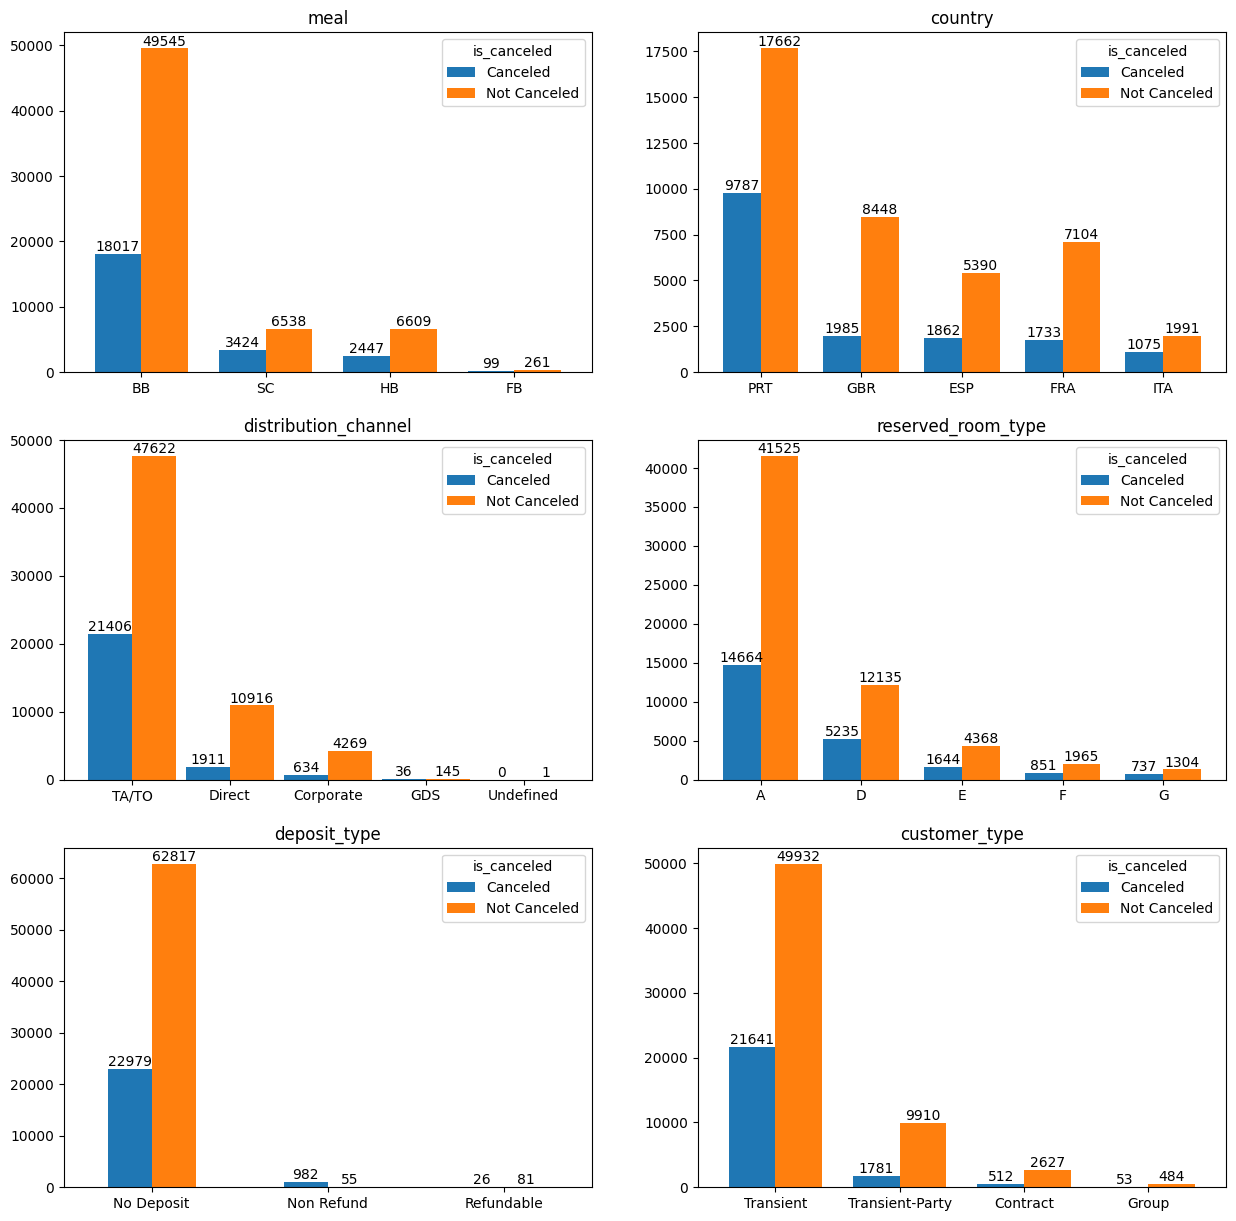

In [36]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

ax = pd.crosstab(index=df.is_canceled, columns=df.meal).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[0, 0], rot=0, width=0.75)
ax.set(xlabel=None, title='meal')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.country).T.sort_values(by='Canceled', ascending=False).iloc[:5].plot(kind='bar', ax=axs[0, 1], rot=0, width=0.75)
ax.set(xlabel=None, title='country')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.distribution_channel).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[1, 0], rot=0, width=0.9)
ax.set(xlabel=None, title='distribution_channel')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.reserved_room_type).T.sort_values(by='Canceled', ascending=False).iloc[:5].plot(kind='bar', ax=axs[1, 1], rot=0, width=0.75)
ax.set(xlabel=None, title='reserved_room_type')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.deposit_type).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[2, 0], rot=0)
ax.set(xlabel=None, title='deposit_type')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.customer_type).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[2, 1], rot=0, width=0.75)
ax.set(xlabel=None, title='customer_type')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

plt.show()

---

# **Data Preprocessing**

## Correlation

In [ ]:
unused_columns = ['total_stays_in_nights', 'total_guests', 'revenue']

# Computing pairwise correlation of numerical variables
df.drop(columns=unused_columns)\
      .corr(method='spearman', # Using Spearman's method for non-parametric variables
            numeric_only=True)\
      .style.background_gradient(cmap='YlGnBu').format(formatter='{:.3f}') # Adding colors & rounding numbers displayed

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000,0.136,0.097,0.012,0.292,0.415,0.228,0.050,-0.002,0.000,-0.191,0.056,0.098,0.101,-0.110,0.061
arrival_date_year,0.136,1.000,-0.516,-0.011,0.009,0.018,0.058,0.043,-0.023,-0.109,0.033,-0.005,-0.029,0.189,-0.041,0.066
arrival_date_week_number,0.097,-0.516,1.000,0.088,0.036,0.041,0.025,0.017,0.017,0.047,-0.047,0.018,-0.000,0.114,0.010,0.044
arrival_date_day_of_month,0.012,-0.011,0.088,1.000,-0.009,-0.017,0.003,0.017,0.000,-0.004,-0.001,0.005,0.012,0.019,0.008,-0.003
stays_in_weekend_nights,0.292,0.009,0.036,-0.009,1.000,0.326,0.128,0.035,0.018,-0.028,-0.108,0.021,-0.039,0.044,-0.044,0.035
stays_in_week_nights,0.415,0.018,0.041,-0.017,0.326,1.000,0.170,0.045,0.024,-0.031,-0.135,0.051,0.006,0.081,-0.051,0.054
adults,0.228,0.058,0.025,0.003,0.128,0.170,1.000,0.068,0.027,-0.087,-0.238,-0.075,-0.034,0.335,0.013,0.157
children,0.050,0.043,0.017,0.017,0.035,0.045,0.068,1.000,0.032,-0.030,-0.050,0.047,-0.029,0.284,0.041,0.055
babies,-0.002,-0.023,0.017,0.000,0.018,0.024,0.027,0.032,1.000,-0.007,-0.016,0.117,-0.007,0.021,0.033,0.092
previous_cancellations,0.000,-0.109,0.047,-0.004,-0.028,-0.031,-0.087,-0.030,-0.007,1.000,0.247,-0.017,0.021,-0.081,-0.008,-0.009


Notes:
* If there are no repeated/duplicated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone (linear) function of the other. If Y variable tends to increase when X variable increases, the Spearman correlation coefficient is positive —and vice versa for negative coefficient.
* Pairing of variables with moderate to high positive correlation value (0.33 - 1) are:
    * `is_repeated_guest` & `previous_bookings_not_canceled`
    * `previous_cancellations` & `previous_bookings_not_canceled`

Correlated variables provide redundant information and reducing prediction model's ability to generalize (causing overfitting). Therefore, **variable which causes this correlation will not be used: `previous_bookings_not_canceled`**.

* adults - adr = 0.34  
    * moderately correlated?  
    * which one to drop? adr?
* arrival_date_week_number = drop
* lead_time - stays_in_week_nights?

In [ ]:
# Selecting categorical variables as subset
categorical_target_vars = df.select_dtypes(include='object')\
                            .combine_first(other=df[['is_canceled']]) # Combining subset with target variable

# Computing pairwise correlation of categorical & target variables
phik_matrix(df=categorical_target_vars, 
            # Applying target as interval column/variable
            interval_cols='is_canceled')\
            .style.background_gradient(cmap='YlGnBu').format(formatter='{:.3f}')

,arrival_date_month,assigned_room_type,country,customer_type,deposit_type,distribution_channel,hotel,is_canceled,is_repeated_guest,market_segment,meal,reservation_status,reservation_status_date,reserved_room_type
arrival_date_month,1.000,0.095,0.262,0.213,0.114,0.125,0.076,0.108,0.122,0.168,0.147,0.151,0.977,0.110
assigned_room_type,0.095,1.000,0.139,0.175,0.135,0.146,0.477,0.120,0.088,0.171,0.346,0.148,0.219,0.940
country,0.262,0.139,1.000,0.230,0.226,0.316,0.445,0.235,0.282,0.401,0.232,0.322,0.505,0.163
customer_type,0.213,0.175,0.230,1.000,0.053,0.111,0.094,0.193,0.165,0.453,0.194,0.097,0.493,0.152
deposit_type,0.114,0.135,0.226,0.053,1.000,0.049,0.034,0.100,0.009,0.304,0.034,0.342,0.581,0.081
distribution_channel,0.125,0.146,0.316,0.111,0.049,1.000,0.111,0.123,0.296,0.772,0.115,0.147,0.333,0.224
hotel,0.076,0.477,0.445,0.094,0.034,0.111,1.000,0.108,0.074,0.164,0.467,0.043,0.260,0.408
is_canceled,0.108,0.120,0.235,0.193,0.100,0.123,0.108,1.000,0.141,0.206,0.082,1.000,0.367,0.072
is_repeated_guest,0.122,0.088,0.282,0.165,0.009,0.296,0.074,0.141,1.000,0.378,0.105,0.055,0.192,0.078
market_segment,0.168,0.171,0.401,0.453,0.304,0.772,0.164,0.206,0.378,1.000,0.231,0.234,0.477,0.210


Notes:
* Phi_K library is used to compute correlation between categorical and interval variables.
    * Based on Pearson's chi-squared contingency test —a hypothesis test for independence between two or more variables.
    * `is_canceled` is added into this analysis because we would want to find the association between categorical variables and the target of this prediction model, and also applied as interval variable because the difference between values in this column (`1` or `0`) is meaningful.
    * Phi_K correlation matrix drops missing value from the data to calculate the correlation coefficient by default (parameter `dropna` already set to `True`).
    * It captures any non-linear relationship between variables, and has a built-in noise reduction against statistical fluctuations or outliers (parameter `noise_correction` also set to `True` by default).
    * Correlation coefficient value is between 0 and 1, hence no indication of relationship direction between variables.
* There are plenty of variables pairing with moderate to high correlation value (0.33 - 1).
    * First step of this analysis segment will drop correlated variables with target `is_canceled`:
        * `agent`
        * `company`
        * `reservation_status`
        * `reservation_status_date` 

In [ ]:
# Dropping variables correlated with target
categorical_target_vars.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

# Verifying process
phik_matrix(df=categorical_target_vars, interval_cols='is_canceled').style.background_gradient(cmap='YlGnBu').format(formatter='{:.3f}')

,arrival_date_month,assigned_room_type,country,customer_type,deposit_type,distribution_channel,hotel,is_canceled,is_repeated_guest,market_segment,meal,reserved_room_type
arrival_date_month,1.000,0.095,0.262,0.213,0.114,0.125,0.076,0.108,0.122,0.168,0.147,0.110
assigned_room_type,0.095,1.000,0.139,0.175,0.135,0.146,0.477,0.120,0.088,0.171,0.346,0.940
country,0.262,0.139,1.000,0.230,0.226,0.316,0.445,0.235,0.282,0.401,0.232,0.163
customer_type,0.213,0.175,0.230,1.000,0.053,0.111,0.094,0.193,0.165,0.453,0.194,0.152
deposit_type,0.114,0.135,0.226,0.053,1.000,0.049,0.034,0.100,0.009,0.304,0.034,0.081
distribution_channel,0.125,0.146,0.316,0.111,0.049,1.000,0.111,0.123,0.296,0.772,0.115,0.224
hotel,0.076,0.477,0.445,0.094,0.034,0.111,1.000,0.108,0.074,0.164,0.467,0.408
is_canceled,0.108,0.120,0.235,0.193,0.100,0.123,0.108,1.000,0.141,0.206,0.082,0.072
is_repeated_guest,0.122,0.088,0.282,0.165,0.009,0.296,0.074,0.141,1.000,0.378,0.105,0.078
market_segment,0.168,0.171,0.401,0.453,0.304,0.772,0.164,0.206,0.378,1.000,0.231,0.210


Notes:
* Number of pairings of variables with moderate to high correlation are listed below:
    * `hotel`: 4 pairings
    * `assigned_room_type` and `market_segment`: 3 pairings
    * `country`, `meal`, and `reserved_room_type`: 2 pairings
    * `customer_type` and `distribution_channel`: 1 pairing
* To reduce this number, the second step of this segment will drop top 3 variables with the highest amount of pairings:
    * `hotel`
    * `assigned_room_type`
    * `market_segment`

In [ ]:
# Dropping top 3 variables with the highest amount of correlation pairings
categorical_target_vars.drop(columns=['hotel', 'assigned_room_type', 'market_segment'], inplace=True)

# Verifying process
phik_matrix(df=categorical_target_vars, interval_cols='is_canceled').style.background_gradient(cmap='YlGnBu').format(formatter='{:.3f}')

,arrival_date_month,country,customer_type,deposit_type,distribution_channel,is_canceled,is_repeated_guest,meal,reserved_room_type
arrival_date_month,1.000,0.262,0.213,0.114,0.125,0.108,0.122,0.147,0.110
country,0.262,1.000,0.230,0.226,0.316,0.235,0.282,0.232,0.163
customer_type,0.213,0.230,1.000,0.053,0.111,0.193,0.165,0.194,0.152
deposit_type,0.114,0.226,0.053,1.000,0.049,0.100,0.009,0.034,0.081
distribution_channel,0.125,0.316,0.111,0.049,1.000,0.123,0.296,0.115,0.224
is_canceled,0.108,0.235,0.193,0.100,0.123,1.000,0.141,0.082,0.072
is_repeated_guest,0.122,0.282,0.165,0.009,0.296,0.141,1.000,0.105,0.078
meal,0.147,0.232,0.194,0.034,0.115,0.082,0.105,1.000,0.253
reserved_room_type,0.110,0.163,0.152,0.081,0.224,0.072,0.078,0.253,1.000


## Outlier

In [ ]:
# Defining function for detecting outlier
def detect_outlier(variable):
    Q1, Q3 = df[variable].quantile(q=0.25), df[variable].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_boundary, upper_boundary = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df.loc[(df[variable] <  (lower_boundary)) | (df[variable] > (upper_boundary))]
    return outliers

Notes:

* Outlier detection uses adjusted box-plot method:
    * Used for data with non-normal (skewed) distribution.
    * Q1 and Q3 are defined as 25th and 75th percentile of the data, respectively.
    * Interquartile range (IQR) as the distance between Q1 and Q3.
    * Boundaries for this method are defined as 1.5 of IQR for both side, and
    * Data points outside these boundaries are flagged as outliers.

In [ ]:
numeric_vars = df.select_dtypes(include='number')

# Showing summary of outlier in numerical variables
pd.DataFrame(data={'numeric_variables': numeric_vars.columns,
                   'n': [detect_outlier(var).shape[0] for var in numeric_vars],
                   '%': [round(number=detect_outlier(var).shape[0] / df.shape[0] * 100, ndigits=2) for var in numeric_vars],
                   'sample': [sorted(detect_outlier(var)[var].unique()) for var in numeric_vars],
                   'min': [detect_outlier(var)[var].min() for var in numeric_vars],
                   'max': [detect_outlier(var)[var].max() for var in numeric_vars]})

,numeric_variables,n,%,sample,min,max
0,lead_time,2470,2.84,"[295, 296, 297, 298, 299, 300, 301, 302, 303, ...",295.00,737.0
1,arrival_date_year,0,0.00,[],NaN,NaN
2,arrival_date_week_number,0,0.00,[],NaN,NaN
3,arrival_date_day_of_month,0,0.00,[],NaN,NaN
4,stays_in_weekend_nights,218,0.25,"[6, 7, 8, 9, 10, 12, 13, 14, 16]",6.00,16.0
5,stays_in_week_nights,1522,1.75,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",9.00,41.0
6,total_stays_in_nights,3001,3.45,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...",10.00,57.0
7,adults,22600,25.99,"[0, 1, 3, 4, 5, 6, 10, 20, 26, 27, 40, 50, 55]",0.00,55.0
8,children,8353,9.61,"[1, 2, 3, 10]",1.00,10.0
9,babies,911,1.05,"[1, 2, 9, 10]",1.00,10.0


Notes:

* Depending on the context, outliers either (1) deserve special attention or (2) should be completely ignored. 
    1. Take an example of `lead_time`: if unusual number of days are observed, it may be a good idea to pay extra attention to them and figure out whether these values are sensible or not (based on the data description). So in instances like these, it is useful to investigate the outlier values and handling them accordingly.
    2. If outliers are however, introduced due to mechanical error, measurement error or anything else that cannot be generalized, it is a good idea to remove these outliers before feeding the data to the modeling algorithm —because some algorithms are sensitive to outliers.

| Variable | Insights |
| --- | --- |
| lead_time | customer bisa aja booking dari jauh hari; misal booking pada tahun x untuk menginap tahun x + 2 sehingga `lead_time` = ~730 |
| stays_in_weekend_nights | customer bisa aja booking untuk menginap selama 19 hari weekend |
| stays_in_week_nights | customer bisa aja booking untuk menginap selama 50 hari weekday |
| adults | customer bisa memesan untuk rombongan yang tidak berisi orang dewasa (`adults` = 0)? |
| | customer bisa aja memesan untuk rombongan yang berisi 55 orang dewasa |
| children | customer bisa aja memesan untuk rombongan yang berisi 10 orang remaja |
| babies | customer bisa aja memesan untuk rombongan yang berisi 10 orang anak-anak |
| previous_cancellations | customer bisa aja memiliki riwayat pembatalan booking hingga 26x |
| previous_bookings_not_canceled | menandakan bahwa customer adalah pelanggan yang rutin booking Hotel (hingga memiliki riwayat 72x booking) |
| booking_changes | customer bisa aja memiliki riwayat mengubah spesifikasi di dalam booking hingga 21x, bahkan hingga booking tersebut dibatalkan |
| days_in_waiting_list | customer bisa menunggu hingga ~365 hari (1 tahun) hingga pemesanannya disetujui oleh pihak hotel? |
| adr | menandakan bahwa pendapatan harian hotel bisa berfluktuatif hingga 5.400 satuan moneter per hari |
| required_car_parking_spaces | customer bisa aja memesan untuk rombongan yang membutuhkan 8 tempat parkir |
| total_of_special_requests | customer bisa aja memiliki 5 permintaan khusus dalam pemesanannya |

Notes:

* `previous_cancellations` tinggi (outlier) belum tentu `is_canceled`, karena nilai median dari bivariat `previous_cancellations` dengan `is_canceled` adalah 0
    * begitu pula dengan `previous_bookings_not_canceled`, tapi kolom ini redundant & di drop
    * begitu pula dengan `booking_changes`
    * begitu pula dengan `days_in_waiting_list`?
* There are several options to handle outlier, namely:
    * Scaling
        * When the distribution of the variable is skewed, it is better to scale using the median and quantiles method, which is more robust to outliers.
    * Transformation
        * Since this analysis is in the context of a business setting, it is better to use the original variable without transformation to train the model, as this would represent a simpler situation at the time of asking developers to implement the model in real life, and also it will be easier to interpret.
    * Binning
        * Equal frequency binning is straightforward to implement, and by spreading the values of the observations more evenly, it may help boost the model's performance. On the other hand, arbitrary binning (including equal width binning) may also disrupt the relationship with the target on occasion.
        * When engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. These intervals may be defined both arbitrarily or following some criteria of use to the business. Typical variables to be applied using this domain knowledge discretization are Age and Income. 
        * Therefore, whenever possible, it will bring value to examine whether such type of binning is the right strategy, and it will depend on the variable and the model that will be used to make the prediction.

## Cardinality

In [ ]:
# Listing categorical variables
categorical_vars = df.select_dtypes(include='object')

# Showing summary of cardinality in categorical variables
pd.DataFrame(data={'categorical_columns': categorical_vars.columns,
                   'unique (n)': categorical_vars.nunique(dropna=False).values,
                   'unique_sample': [df[var].unique() for var in categorical_vars],
                   'rare_label (n)': [sum(df[var].value_counts(normalize=True, dropna=False) < 0.05) for var in categorical_vars],
                   'rare_label_sample': [df[df[var].map(arg=df[var].value_counts(normalize=True, dropna=False) < 0.05)][var].unique() 
                                         for var in categorical_vars]})

,categorical_columns,unique (n),unique_sample,rare_label (n),rare_label_sample
0,hotel,2,"[Resort Hotel, City Hotel]",0,[]
1,is_canceled,2,"[Not Canceled, Canceled]",0,[]
2,arrival_date_month,12,"[July, August, September, October, November, D...",0,[]
3,meal,4,"[BB, FB, HB, SC]",1,[FB]
4,country,177,"[PRT, GBR, USA, ESP, IRL, FRA, ROU, NOR, OMN, ...",172,"[USA, IRL, ROU, NOR, OMN, ARG, POL, BEL, CHE, ..."
5,market_segment,7,"[Direct, Corporate, Online TA, Offline TA/TO, ...",3,"[Corporate, Complementary, Aviation]"
6,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]",2,"[Undefined, GDS]"
7,is_repeated_guest,2,"[Not Repeated, Repeated]",1,[Repeated]
8,reserved_room_type,10,"[C, A, D, E, G, F, H, L, B, P]",7,"[C, G, F, H, L, B, P]"
9,assigned_room_type,12,"[C, A, D, E, G, F, I, B, H, L, K, P]",9,"[C, G, F, I, B, H, L, K, P]"


Notes:

* The number of different (unique) labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality.
    * Also different categories appear in the dataset with different frequencies. Some labels appear a lot in the dataset, whereas some other labels appear only in a few number of observations —hence called rare labels.
* High cardinality & rare values may pose the following problems:
    * A big number of labels (whether frequent or infrequent) within a variable may introduce noise with little, if any, information, therefore making machine learning model prone to over-fit.
    * Some of the labels may only be present in the training data set, but not in the test set, therefore machine learning algorithm may over-fit to the training set.
    * Contrarily, some labels may appear only in the test set, therefore leaving the machine learning algorithm unable to perform a calculation over the new (unseen) observation —a case of model underfit.
    * In particular, tree-based model can be biased towards variable with lots of labels. Thus, their performance may be affected by high cardinality.
    * Sometimes rare values are indeed important. If we are building a model to predict hotel booking cancellation, which are by nature relatively rare compared to successful booking, then a rare value in a certain variable may be very predictive. This rare value could be telling us that the observation is most likely a cancelled booking, and it would be best not to ignore it.
* High number of cardinality in dataset are detected in `country`, `agent`, `company`, and `reservation_status_date` (relative to other variables), while rare labels are found in all variables except `hotel` and `arrival_date_month`
* solution: 
    1. reduce by recategorize, either all categories or only specific labels deemed rare
    2. use the labels as-is (without any modifications)


* `lead_time` binning 1 bulan, 2-12 bulan, > 12 bulan
* `stays_in_nights` berarti checkout malam; bisa aja guest checkout siang sehingga `stays_in_nights` = 0
* `adult` + `children` + `babies` = `total_guest`
    * `total_guest` = 0 maka missing value & drop
* lengkapi EDA

---

# Modeling

In [ ]:
# Importing libraries for prediction modeling
from sklearn.model_selection import train_test_split
from pycaret.internal.preprocess.transformers import TransformerWrapper
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from pycaret.classification import *

In [ ]:
df.replace(to_replace=['Not Canceled', 'Canceled'], value=[0, 1], inplace=True)
df.replace(to_replace=['Not Repeated', 'Repeated'], value=[0, 1], inplace=True)

In [ ]:
# Setting arbitrary number to 'random_state'
random_state_ = 1

# Splitting dataset into dataframes for training and testing
df_train, df_test = train_test_split(df, random_state=random_state_, stratify=df.is_canceled)

# Showing dataframes' summary
display(pd.DataFrame(data={'dataset': ['df_train', 'df_test'],
                   'row (n)': [df_train.shape[0], df_test.shape[0]],
                   'row (%)': [df_train.shape[0] / df.shape[0] * 100, df_test.shape[0] / df.shape[0] * 100],
                   'column (n)': [df_train.shape[1], df_test.shape[1]]}))

display(pd.DataFrame(data={'df_train': round(number=df_train.is_canceled.value_counts(normalize=True) * 100, ndigits=3),
                   'df_test': round(number=df_test.is_canceled.value_counts(normalize=True) * 100, ndigits=3)}).T)

,dataset,row (n),row (%),column (n)
0,df_train,65205,75.0,33
1,df_test,21735,25.0,33


is_canceled,0,1
df_train,72.410,27.590
df_test,72.409,27.591


Notes:
* Splitting ...
* `random_state` is required to control the random sampling process applied to dataset before splitting into `df_train` and `df_test` —including data for validation, which will be used in the later stage of modeling.
    * This is done so that the result of splitting (rows, columns, and all their values/data points/observations) will be identical for each time the programming code in this modeling section is called.
* By applying `stratify` parameter, the dataset is sampled in a stratified fashion, to ensure that relative class/target `is_canceled` frequencies is approximately preserved in each train and validation fold.
    * tapi masih imbalance...

In [ ]:
# Creating custom pipeline for modeling
pipeline = [
    ('ordinal', TransformerWrapper(
        transformer=OrdinalEncoder(mapping=[{'col': 'meal', 
                                             'mapping': {'SC': 0, 
                                                         'BB': 1, 
                                                         'HB': 2, 
                                                         'FB': 3}}]))),
    ('binary', TransformerWrapper(
        include=['country'], 
        transformer=BinaryEncoder())),
    ('onehot', TransformerWrapper(
        include=['arrival_date_month', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], 
        transformer=OneHotEncoder(handle_unknown='ignore')))
]

Notes:

* `OrdinalEncoder` diterapkan pada `meal` dengan mengatur order dari type of meal booked: SC < BB < HB < FB
* `BinaryEncoder` diterapkan pada `country` karena ...
* `OneHotEncoder` diterapkan pada kolom kategorikal lainnya:
    * `distribution_channel`, `reserved_room_type`, `deposit_type`, and `customer_type` karena cardinality kolom-kolom ini berada di bawah angka 15.
    * handle...

## Experiment #0: Basic Model

In [ ]:
# ...
kwargs = {
    'data': df_train,
    'target': 'is_canceled',
    'preprocess': False, # Disabling PyCaret's in-built preprocessing pipeline
    'session_id': random_state_, # Using defined random state for train-validation splitting
    'ignore_features': ['hotel', 'arrival_date_week_number', 'total_stays_in_nights', 'total_guests', 'market_segment', 'previous_bookings_not_canceled', 
                        'assigned_room_type', 'agent', 'company', 'revenue', 'reservation_status', 'reservation_status_date'] # ...
}

# Initializing model training environment
experiment0 = setup(**kwargs, 
                    custom_pipeline=pipeline) # Implementing custom pipeline

,Description,Value
0,Session id,1
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(65205, 33)"
4,Transformed data shape,"(65205, 58)"
5,Transformed train set shape,"(45643, 58)"
6,Transformed test set shape,"(19562, 58)"
7,Ignore features,12
8,Numeric features,15
9,Categorical features,7


In [ ]:
# Validating usage of custom pipeline
experiment0.get_config(variable='pipeline')

Pipeline(memory=FastMemory(location=C:\Users\GARUDA~1\AppData\Local\Temp\joblib),
         steps=[('ordinal',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=OrdinalEncoder(cols=['arrival_date_month',
                                                                                                    'meal',
                                                                                                    'country',
                                                                                                    'distribution_channel',
                                                                                                    'reserved_room_type',
                                                                                                    'deposit_type',
                                                                                                    'customer_type'],
                                                                                              dr...
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['arrival_date_month',
                                                                            'distribution_channel',
                                                                            'reserved_room_type',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop=None,
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             feature_name_combiner='concat',
                                                                                             handle_unknown='ignore',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse_output=True))))],
         verbose=False)

In [ ]:
# Validating feature transformation using custom pipeline
X_train_transformed = experiment0.get_config(variable='X_train_transformed')
with pd.option_context('display.max_columns', None):
    display(X_train_transformed)

,lead_time,arrival_date_year,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest,previous_cancellations,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,booking_changes,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,days_in_waiting_list,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,adr,required_car_parking_spaces,total_of_special_requests
57405,3,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19,1,3,1,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,110.000000,0,0
20559,172,2016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,5,2,1,1,1,0,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,155.649994,1,2
48057,169,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,2,3,2,1,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,117.000000,0,1
24493,92,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,0,4,2,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,37.799999,0,0
30547,15,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30,0,4,2,0,0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,84.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,0,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2,0,0,0,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.000000,0,0
50538,199,2017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,3,2,0,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,89.099998,0,1
71420,182,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,31,1,3,0,2,0,1,0,0,0,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,83.500000,0,1
74739,2,2017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,88.000000,0,0


Notes:

* Setelah kita berhasil mentransformasi data *train*, berikutnya dapat digunakan untuk pemodelan regresi.  
* PyCaret menyediakan kumpulan (*library*) model yang dapat diakses dengan fungsi `compare_models()`, sehingga kita bisa membandingkan performa serangkaian model dan memilih beberapa *estimator* saja sebagai *benchmark* untuk tahapan pemodelan berikutnya.

In [ ]:
# Comparing performance of models available in PyCaret
holdout_experiment0 = experiment0.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8258,0.8813,0.5755,0.7359,0.6458,0.5326,0.5398,23.3270
rf,Random Forest Classifier,0.8233,0.8742,0.5442,0.7469,0.6296,0.5173,0.5285,5.6930
xgboost,Extreme Gradient Boosting,0.8229,0.8779,0.5794,0.7240,0.6436,0.5277,0.5335,1.4530
lightgbm,Light Gradient Boosting Machine,0.8206,0.8754,0.5530,0.7317,0.6298,0.5144,0.5233,0.8900
et,Extra Trees Classifier,0.8133,0.8578,0.5316,0.7186,0.6111,0.4918,0.5015,8.6630
gbc,Gradient Boosting Classifier,0.7958,0.8400,0.4206,0.7236,0.5319,0.4128,0.4377,9.0240
ada,Ada Boost Classifier,0.7792,0.8128,0.4108,0.6607,0.5065,0.3741,0.3917,2.3790
lr,Logistic Regression,0.7706,0.7860,0.3516,0.6573,0.4580,0.3291,0.3551,9.7170
lda,Linear Discriminant Analysis,0.7655,0.7806,0.3002,0.6662,0.4135,0.2925,0.3289,0.7950
ridge,Ridge Classifier,0.7622,0.7806,0.2435,0.6977,0.3607,0.2545,0.3080,0.4340


In [ ]:
# Assigning 'Random Forest Classifier' as basic model
model_experiment0 = experiment0.create_model(estimator='rf', 
                                             return_train_score=True) # Showing cross-validation score

## Experiment #1: Handling Outlier with Scaling

In [ ]:
# Adding 'RobustScaler' to custom pipeline
pipeline.append(
    ('robust', TransformerWrapper(
        include=['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'adr', 
                 'required_car_parking_spaces', 'total_of_special_requests'],
        transformer=RobustScaler())))

# Setting experiment #1 training environment
experiment1 = setup(**kwargs, custom_pipeline=pipeline)

,Description,Value
0,Session id,1
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(65205, 33)"
4,Transformed data shape,"(65205, 58)"
5,Transformed train set shape,"(45643, 58)"
6,Transformed test set shape,"(19562, 58)"
7,Ignore features,12
8,Numeric features,15
9,Categorical features,7


In [ ]:
# Validating usage of custom pipeline
experiment1.get_config(variable='pipeline')

Pipeline(memory=FastMemory(location=C:\Users\GARUDA~1\AppData\Local\Temp\joblib),
         steps=[('ordinal',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=OrdinalEncoder(cols=['arrival_date_month',
                                                                                                    'meal',
                                                                                                    'country',
                                                                                                    'distribution_channel',
                                                                                                    'reserved_room_type',
                                                                                                    'deposit_type',
                                                                                                    'customer_type'],
                                                                                              dr...
                                                                            'arrival_date_day_of_month',
                                                                            'stays_in_weekend_nights',
                                                                            'stays_in_week_nights',
                                                                            'adults',
                                                                            'children',
                                                                            'babies',
                                                                            'previous_cancellations',
                                                                            'booking_changes',
                                                                            'days_in_waiting_list',
                                                                            'adr',
                                                                            'required_car_parking_spaces',
                                                                            'total_of_special_requests'],
                                                                   transformer=RobustScaler(copy=True,
                                                                                            quantile_range=(25.0,
                                                                                                            75.0),
                                                                                            unit_variance=False,
                                                                                            with_centering=True,
                                                                                            with_scaling=True))))],
         verbose=False)

In [ ]:
# Validating feature transformation using custom pipeline
X_train_transformed = experiment1.get_config(variable='X_train_transformed')
with pd.option_context('display.max_columns', None):
    display(X_train_transformed)

,lead_time,arrival_date_year,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest,previous_cancellations,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,booking_changes,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,days_in_waiting_list,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,adr,required_car_parking_spaces,total_of_special_requests
57405,-0.412281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,0.0,0.333333,-1.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.175705,0.0,0.0
20559,1.070175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0.0,1.000000,0.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.904880,1.0,2.0
48057,1.043860,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,0.333333,0.0,1.0,0.0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.287517,0.0,1.0
24493,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.533333,-0.5,0.666667,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.977558,0.0,0.0
30547,-0.307018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.933333,-0.5,0.666667,0.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.239597,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,-0.438596,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.466667,0.5,-0.666667,-2.0,0.0,0.0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.581343,0.0,0.0
50538,1.307018,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.5,0.333333,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.158134,0.0,1.0
71420,1.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.333333,-2.0,2.0,0.0,1,0,0,0,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.247584,0.0,1.0
74739,-0.421053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,-0.5,-0.333333,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.175705,0.0,0.0


In [ ]:
# Comparing performances of models in experiment #1
holdout_experiment1 = experiment1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8258,0.8813,0.5755,0.7359,0.6458,0.5326,0.5398,25.1230
rf,Random Forest Classifier,0.8233,0.8742,0.5445,0.7467,0.6297,0.5174,0.5285,6.6720
xgboost,Extreme Gradient Boosting,0.8229,0.8779,0.5794,0.7240,0.6436,0.5277,0.5335,1.1770
lightgbm,Light Gradient Boosting Machine,0.8205,0.8754,0.5526,0.7315,0.6295,0.5141,0.5230,0.9160
et,Extra Trees Classifier,0.8133,0.8578,0.5316,0.7186,0.6111,0.4918,0.5015,8.4330
gbc,Gradient Boosting Classifier,0.7958,0.8400,0.4206,0.7236,0.5319,0.4128,0.4377,6.2120
ada,Ada Boost Classifier,0.7792,0.8128,0.4108,0.6607,0.5065,0.3741,0.3917,2.4460
lr,Logistic Regression,0.7700,0.7884,0.3475,0.6569,0.4543,0.3258,0.3524,2.7740
knn,K Neighbors Classifier,0.7694,0.7721,0.5065,0.5969,0.5479,0.3945,0.3969,2.8610
lda,Linear Discriminant Analysis,0.7655,0.7806,0.3002,0.6662,0.4135,0.2925,0.3289,0.8850


In [ ]:
# Assigning 'Random Forest Classifier' as experimentation model
model_experiment1 = experiment1.create_model(estimator='rf', 
                                             return_train_score=True) # Showing cross-validation score

In [ ]:
experiment0_mean = experiment0.pull().loc[('CV-Val', 'Mean'), 'Prec.']
experiment0_std = experiment0.pull().loc[('CV-Val', 'Std'), 'Prec.']
experiment1_mean = experiment1.pull().loc[('CV-Val', 'Mean'), 'Prec.']
experiment1_std = experiment1.pull().loc[('CV-Val', 'Std'), 'Prec.']

pd.DataFrame(data={'Experiment #0': [experiment0_mean, experiment0_std, 
                                     f'{experiment0_mean - experiment0_std} - {experiment0_mean + experiment0_std}'],
                   'Experiment #1': [experiment1_mean, experiment1_std, 
                                     f'{round(number=experiment1_mean - experiment1_std, ndigits=4)} - {experiment1_mean + experiment1_std}']},
             index=['Mean', 'Std', 'Range'])

,Experiment #0,Experiment #1
Mean,0.7469,0.7467
Std,0.0163,0.0165
Range,0.7306 - 0.7632,0.7302 - 0.7632


Notes:

* no significant difference
* Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable `x` >= a certain value, and therefore, the outlier will fall on each side of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.